# **Trabalho de Conclusão de Curso - PUC-MINAS**

Aluno: Marco Antônio Ferreira Duran

**Um estudo de averiguação cadastral do Benefício de Prestação Continuada**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Criação de Modelos**

## **Códigos e Rotinas Auxiliares**

**Importação de Bibliotecas**

In [ ]:
# instalação
!pip install pyod

# importação de bibliotecas 
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn import linear_model
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from pyod.models.mad import MAD
from collections import Counter
from scipy import stats
from scipy.spatial.distance import cdist
from sklearn.svm import OneClassSVM
from pyod.models.knn import KNN


     |████████████████████████████████| 113 kB 18.4 MB/s 
  Created wheel for pyod: filename=pyod-0.9.5-py3-none-any.whl size=132699 sha256=a5238cd6d543966ce24ac739156d7fac47f0060f81d9b0db3d146186980c8372
  Stored in directory: /root/.cache/pip/wheels/3d/bb/b7/62b60fb451b33b0df1ab8006697fba7a6a49709a629055cf77
Successfully built pyod


**Rotina de Desenho de Outliers**

In [ ]:
def plota_anomalias(df, titulo, x='idade', y='total_mov', 
                    xl="Movimentação", yl="Idade", 
                    escalax=[], escalay=[], esquemadecores=['green','crimson'], 
                    tgrafico=(12,4), ftittam=16, feixotam=14):

    categorias = df['Predictions'].to_numpy()
    colormap = np.array(esquemadecores)

    f = plt.figure(figsize=tgrafico)
    f = plt.scatter(df[x], df[y], c=colormap[categorias],s=15)
    f = plt.xlabel(xl,fontsize=feixotam)
    f = plt.ylabel(yl,fontsize=feixotam)
    f = plt.title(titulo,fontsize=ftittam)
    if escalax:
      f = plt.xticks(escalax)
    if escalay:
      f = plt.yticks(escalay)
    plt.show()

**Rotina de execução de modelo**

In [ ]:
def fit_predict_model(modelo, dado, coluna='idade'):
    df = dado.copy()
    data_to_predict = dado[coluna].to_numpy().reshape(-1, 1)
    predictions = modelo.fit_predict(data_to_predict)
    df['Predictions'] = predictions
    
    return df

**Lendo Arquivo de BPC**

In [ ]:
bpc = pd.read_csv("drive/MyDrive/dados_tcc/bpc_mov_trab6.csv")
bpc.shape
bpc.dtypes
bpc.describe()

numbenef         idade     total_mov
count  1.383400e+04  13834.000000  1.383400e+04
mean   5.219463e+09     74.709628  2.807375e+04
std    2.222086e+09      6.033992  1.537188e+05
min    1.001490e+09     65.000000  1.000000e-02
25%    5.140488e+09     70.000000  5.988000e+03
50%    5.518219e+09     73.000000  1.223006e+04
75%    7.024545e+09     78.000000  2.498664e+04
max    7.045553e+09    103.000000  8.445250e+06

**Padronizando o dataframe Zscore**

In [ ]:
bpc_zscore = bpc.copy()
bpc_zscore = (bpc_zscore - bpc_zscore.mean())/(bpc_zscore.std())
bpc_zscore.describe()

numbenef         idade     total_mov
count  1.383400e+04  1.383400e+04  1.383400e+04
mean  -1.186423e-16  9.788084e-16  6.361191e-16
std    1.000000e+00  1.000000e+00  1.000000e+00
min   -1.898204e+00 -1.609155e+00 -1.826305e-01
25%   -3.554095e-02 -7.805161e-01 -1.436763e-01
50%    1.344483e-01 -2.833329e-01 -1.030693e-01
75%    8.123364e-01  5.453059e-01 -2.008282e-02
max    8.217908e-01  4.688500e+00  5.475698e+01

**Normalizadndo dataframe - Max Min**

In [ ]:
bpc_minmax = bpc.copy()
bpc_minmax = (bpc_minmax - bpc_minmax.min())/(bpc_minmax.max() - bpc_minmax.min())
bpc_minmax.describe()

numbenef         idade     total_mov
count  13834.000000  13834.000000  13834.000000
mean       0.697870      0.255517      0.003324
std        0.367648      0.158789      0.018202
min        0.000000      0.000000      0.000000
25%        0.684804      0.131579      0.000709
50%        0.747300      0.210526      0.001448
75%        0.996524      0.342105      0.002959
max        1.000000      1.000000      1.000000

**Váriaveis comuns**

In [ ]:
rd_seed = 42 # semente
n_exec = 5 # número de execuções
tempos = []

**Exportando tempos**

In [ ]:
df = pd.DataFrame(tempos, columns=['metodo','tempo'])
df.to_csv('drive/MyDrive/dados_tcc/tempos.csv', encoding='utf-8')
df.head(10)

metodo     tempo
0              IQR  0.040490
1  IsolationForest  2.197073
2           Zscore  0.011233
3              MAD  0.184316
4           DBSCAN  1.396417
5              LOF  2.311029
6              KNN  2.651916

**Exportando para HTML**

In [ ]:
# drive/MyDrive/
%%shell
jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/bpc_aed.ipynb"
jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/Importa_BPC_Full.ipynb"
jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/modelos.ipynb"


[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/bpc_aed.ipynb to html
[NbConvertApp] Writing 451085 bytes to /content/drive/MyDrive/Colab Notebooks/bpc_aed.html
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Importa_BPC_Full.ipynb to html
[NbConvertApp] Writing 318918 bytes to /content/drive/MyDrive/Colab Notebooks/Importa_BPC_Full.html
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/modelos.ipynb to html
[NbConvertApp] Writing 5330026 bytes to /content/drive/MyDrive/Colab Notebooks/modelos.html


**Verificando versões**

In [ ]:
#stats
import scipy
print(scipy.version.version)

1.4.1


## **Método de Faixa entre quartis**

**Definindo limites**

In [ ]:
def anomalia_iqr(valor, limiteinferior, limitesuperior, valor_anomalia=1):

  # ADAPTAÇÃO - Aqui só vericamos o limite superior
  if valor > limitesuperior:
    return valor_anomalia
  else:
      return 0

def deteccao_iqr(dado, coluna='idade', limiar=1.5, valor_anomalia=1):
  df_trab = dado.copy()
  quartis = dict(dado[coluna].quantile([.25, .5, .75]))
  quartil_3, quartil_1 = quartis[.75], quartis[.25]
  iqr = quartil_3 - quartil_1

  limiteinferior = quartil_1 - (limiar*iqr)
  limitesuperior = quartil_3 + (limiar*iqr)

  df_trab['Predictions'] = dado[coluna].apply(anomalia_iqr, 
                                              args=(limiteinferior, 
                                                    limitesuperior, 
                                                    valor_anomalia))
  return df_trab




**Aplicação do método**

--- 0.040490150451660156 segundos ---
Número total de registros de Outliers [idade]: 235 ( 1.70% )
Número total de registros de Outliers [total_mov]: 879 ( 6.35% )
Número total de registros de Outliers:  1096
Número de beneficiários/benefícios verificados:  13834
Percentual de de Outliers:  7.92%


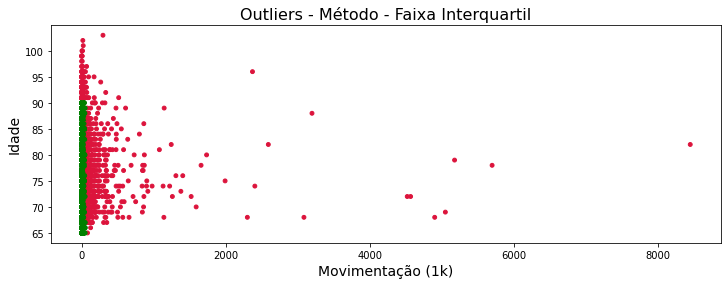

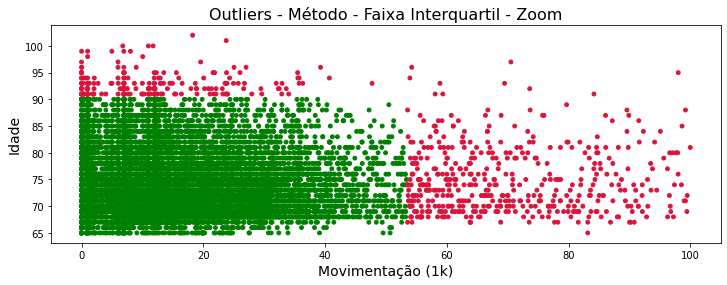

In [ ]:
# Método Univariado usando apply
# Inicia variável
bpc_iqr = bpc.copy()
bpc_iqr['Predictions'] = 0
tempo_exec = 0

for n in range(n_exec):
  start_time = time.time()  
  # Variável Idade
  iqr_df = deteccao_iqr(bpc, coluna="idade", valor_anomalia=1, limiar=1.5)
  # Pega os registros que foram considerados outliers
  pos_idade = iqr_df.query('Predictions == 1').index.values

  # Variável Movimentação
  iqr_df = deteccao_iqr(bpc_iqr, coluna="total_mov", valor_anomalia=2, limiar=1.5)
  # Pega os registros que foram considerados outliers
  pos_mov = iqr_df.query('Predictions == 2').index.values

  # Não iremos fazer diferenças entre os outliers por variável. 
  # Igualamos todas as anomalias pelas índices de cada outlier de variável.
  bpc_iqr.at[pos_idade,'Predictions'] = 1
  bpc_iqr.at[pos_mov,'Predictions'] = 1
  subbpc = bpc_iqr.query('Predictions == 1')

  t_aux = time.time() - start_time
  tempo_exec += t_aux

print("--- %s segundos ---" % (tempo_exec/n_exec))
tempos.append(['IQR', tempo_exec/n_exec])


# Mostra qtd e percentuais
print('Número total de registros de Outliers [idade]:', np.size(pos_idade), '(', 
      format(np.size(pos_idade)/bpc_iqr.shape[0], '.2%'),')')
print('Número total de registros de Outliers [total_mov]:', np.size(pos_mov),'(', 
      format(np.size(pos_mov)/bpc_iqr.shape[0], '.2%'), ')')
print('Número total de registros de Outliers: ', subbpc.shape[0])
print('Número de beneficiários/benefícios verificados: ', bpc_iqr.shape[0])
print('Percentual de de Outliers: ', 
      format(subbpc.shape[0]/bpc_iqr.shape[0], '.2%'))


#plota
bpc_iqr['total_mov'] = bpc_iqr['total_mov'] / 1000
plota_anomalias(bpc_iqr, titulo="Outliers - Método - Faixa Interquartil", 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")


bpc_iqr2 = bpc_iqr.query('total_mov < 100')


plota_anomalias(bpc_iqr2, titulo="Outliers - Método - Faixa Interquartil - Zoom", 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")







**Calculando os limites separamente**

In [ ]:
# Adicionalmente calculamos o limites calculados na rotina


quartil_1 = bpc.quantile(q=0.25)
quartil_3 = bpc.quantile(q=0.75)
limite_superior_mov = quartil_3['total_mov'] + 1.5 * (quartil_3['total_mov'] - quartil_1['total_mov'])
limite_superior_idade = quartil_3['idade'] + 1.5 * (quartil_3['idade'] - quartil_1['idade'])
print('Limite Superior de Movimentação: R$', format(limite_superior_mov, '.2f'))
print('Limite Superior de Idade: ', format(limite_superior_idade, '.2f'), 'anos.')

Limite Superior de Movimentação: R$ 53484.60
Limite Superior de Idade:  90.00 anos.


## **Método Isolation-Forest**

### **1 - n_estimators = 100 e max_samples = 110 contamination = 0.05**

--- 2.044562578201294 segundos ---
Número total de registros de Outliers [idade]: 610 ( 4.41% )
Número total de registros de Outliers [total_mov]: 691 ( 4.99% )
Número de registros de Outliers:  1280
Número de beneficiários/benefícios verificados:  13834
Percentual de de Outliers:  9.25%


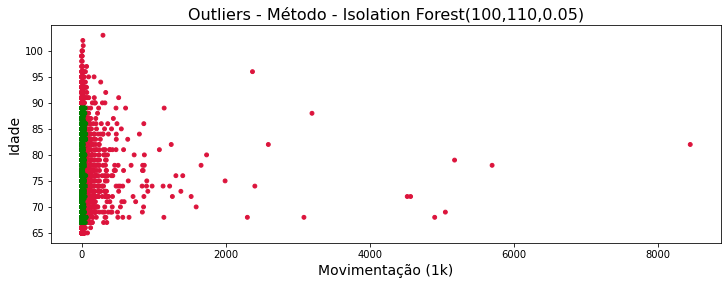

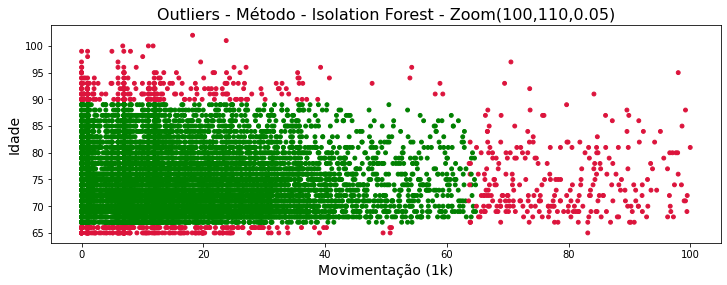

In [ ]:
# Executa com parâmetros n_estimator = 100 max_samples = 110 contamination 0.05
parametros= '(100,110,0.05)'
tempo_exec = 0
start_time = time.time()

iso_forest = IsolationForest(n_estimators=100 ,max_samples=110,
                             contamination=0.05,random_state=rd_seed)
iso_df = fit_predict_model(modelo=iso_forest, coluna='idade', dado=bpc)
outliers_idade = iso_df.query('Predictions == -1').index.values
iso_forest = IsolationForest(n_estimators=100 ,max_samples=110,
                             contamination=0.05,random_state=rd_seed)
iso_df = fit_predict_model(modelo=iso_forest, coluna='total_mov', dado=bpc)
outliers_mov = iso_df.query('Predictions == -1').index.values
# marca outliers
iso_df['Predictions'] = 0
iso_df.at[outliers_idade, 'Predictions'] = 1
iso_df.at[outliers_mov, 'Predictions'] = 1

t = time.time() - start_time
print("--- %s segundos ---" % (t))
tempo_exec += t

#Plota resultado
subbpc = iso_df.query('Predictions == 1')

# Mostra qtd e percentuais
print('Número total de registros de Outliers [idade]:', np.size(outliers_idade), '(', 
      format(np.size(outliers_idade)/iso_df.shape[0], '.2%'),')')
print('Número total de registros de Outliers [total_mov]:', np.size(outliers_mov),'(', 
      format(np.size(outliers_mov)/iso_df.shape[0], '.2%'), ')')
print('Número de registros de Outliers: ', subbpc.shape[0])
print('Número de beneficiários/benefícios verificados: ', iso_df.shape[0])
print('Percentual de de Outliers: ', 
      format(subbpc.shape[0]/iso_df.shape[0], '.2%'))

#plota
iso_df['total_mov'] = iso_df['total_mov'] / 1000
plota_anomalias(iso_df, titulo="Outliers - Método - Isolation Forest"+parametros, 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")

iso_df2 = iso_df.query('total_mov < 100')
plota_anomalias(iso_df2, titulo="Outliers - Método - Isolation Forest - Zoom"+parametros, 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")


### **2 - n_estimators = 100 e max_samples = 110 contamination = 0.1**

--- 1.9798557758331299 segundos ---
Número total de registros de Outliers [idade]: 1009 ( 7.29% )
Número total de registros de Outliers [total_mov]: 1381 ( 9.98% )
Número de registros de Outliers:  2317
Número de beneficiários/benefícios verificados:  13834
Percentual de de Outliers:  16.75%


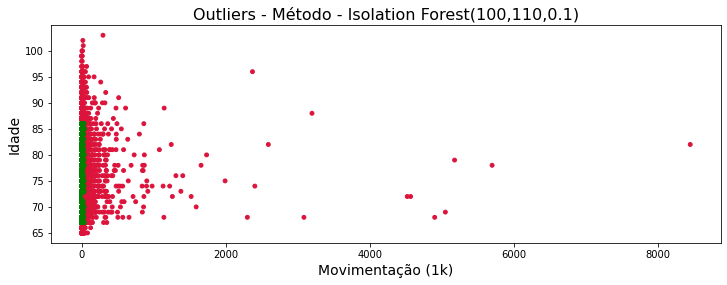

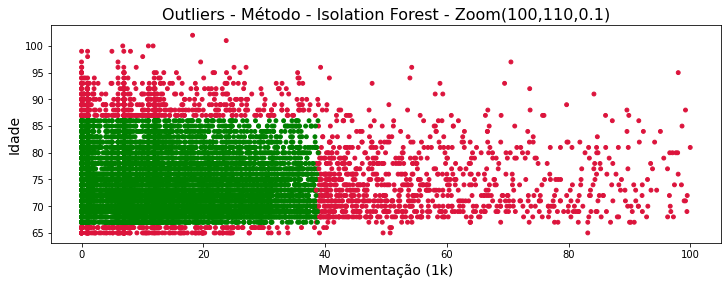

In [ ]:
# Executa com parâmetros n_estimator = 100 max_samples = 110 contamination 0.1
parametros= '(100,110,0.1)'
start_time = time.time()

iso_forest = IsolationForest(n_estimators=100 ,max_samples=110,
                             contamination=0.1,random_state=rd_seed)
# print(iso_forest)



iso_df = fit_predict_model(modelo=iso_forest, coluna='idade', dado=bpc)
outliers_idade = iso_df.query('Predictions == -1').index.values
iso_forest = IsolationForest(n_estimators=100 ,max_samples=110,
                             contamination=0.1,random_state=rd_seed)
iso_df = fit_predict_model(modelo=iso_forest, coluna='total_mov', dado=bpc)

outliers_mov = iso_df.query('Predictions == -1').index.values

# marca outliers
iso_df['Predictions'] = 0
iso_df.at[outliers_idade, 'Predictions'] = 1
iso_df.at[outliers_mov, 'Predictions'] = 1

t = time.time() - start_time
print("--- %s segundos ---" % (t))
tempo_exec += t


#Plota resultado
subbpc = iso_df.query('Predictions == 1')

# Mostra qtd e percentuais
print('Número total de registros de Outliers [idade]:', np.size(outliers_idade), '(', 
      format(np.size(outliers_idade)/iso_df.shape[0], '.2%'),')')
print('Número total de registros de Outliers [total_mov]:', np.size(outliers_mov),'(', 
      format(np.size(outliers_mov)/iso_df.shape[0], '.2%'), ')')
print('Número de registros de Outliers: ', subbpc.shape[0])
print('Número de beneficiários/benefícios verificados: ', iso_df.shape[0])
print('Percentual de de Outliers: ', 
      format(subbpc.shape[0]/iso_df.shape[0], '.2%'))

iso_df['total_mov'] = iso_df['total_mov'] / 1000
plota_anomalias(iso_df, titulo="Outliers - Método - Isolation Forest"+parametros, 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")

iso_df2 = iso_df.query('total_mov < 100')
plota_anomalias(iso_df2, titulo="Outliers - Método - Isolation Forest - Zoom"+parametros, 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")


### **3 - n_estimators = 100 e max_samples = 110 contamination = 0.03**

--- 2.024348497390747 segundos ---
Número total de registros de Outliers [idade]: 368 ( 2.66% )
Número total de registros de Outliers [total_mov]: 415 ( 3.00% )
Número de registros de Outliers:  775
Número de beneficiários/benefícios verificados:  13834
Percentual de de Outliers:  5.60%


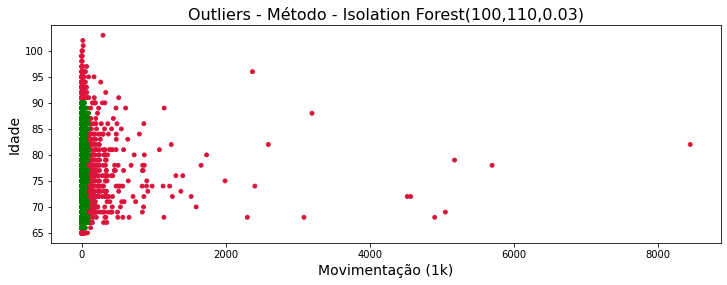

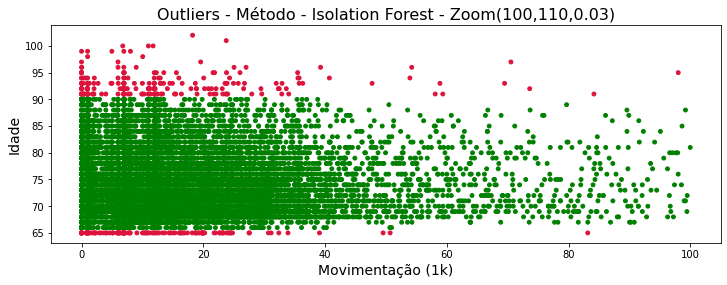

In [ ]:
# Executa com parâmetros n_estimator = 100 max_samples = 110 contamination 0.03
parametros= '(100,110,0.03)'
start_time = time.time()

iso_forest = IsolationForest(n_estimators=100 ,max_samples=110,
                             contamination=0.03,random_state=rd_seed)
# print(iso_forest)



iso_df = fit_predict_model(modelo=iso_forest, coluna='idade', dado=bpc)
outliers_idade = iso_df.query('Predictions == -1').index.values
iso_forest = IsolationForest(n_estimators=100 ,max_samples=110,
                             contamination=0.03,random_state=rd_seed)
iso_df = fit_predict_model(modelo=iso_forest, coluna='total_mov', dado=bpc)

outliers_mov = iso_df.query('Predictions == -1').index.values

# marca outliers
iso_df['Predictions'] = 0
iso_df.at[outliers_idade, 'Predictions'] = 1
iso_df.at[outliers_mov, 'Predictions'] = 1

t = time.time() - start_time
print("--- %s segundos ---" % (t))
tempo_exec += t


#Plota resultado
subbpc = iso_df.query('Predictions == 1')

# Mostra qtd e percentuais
print('Número total de registros de Outliers [idade]:', np.size(outliers_idade), '(', 
      format(np.size(outliers_idade)/iso_df.shape[0], '.2%'),')')
print('Número total de registros de Outliers [total_mov]:', np.size(outliers_mov),'(', 
      format(np.size(outliers_mov)/iso_df.shape[0], '.2%'), ')')
print('Número de registros de Outliers: ', subbpc.shape[0])
print('Número de beneficiários/benefícios verificados: ', iso_df.shape[0])
print('Percentual de de Outliers: ', 
      format(subbpc.shape[0]/iso_df.shape[0], '.2%'))


iso_df['total_mov'] = iso_df['total_mov'] / 1000
plota_anomalias(iso_df, titulo="Outliers - Método - Isolation Forest"+parametros, 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")

iso_df2 = iso_df.query('total_mov < 100')
plota_anomalias(iso_df2, titulo="Outliers - Método - Isolation Forest - Zoom"+parametros, 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")


### **4 - n_estimators = 100 e max_samples = 110 contamination = 0.02**

--- 2.977886915206909 segundos ---
Número total de registros de Outliers [idade]: 165 ( 1.19% )
Número total de registros de Outliers [total_mov]: 275 ( 1.99% )
Número de registros de Outliers:  435
Número de beneficiários/benefícios verificados:  13834
Percentual de de Outliers:  3.14%


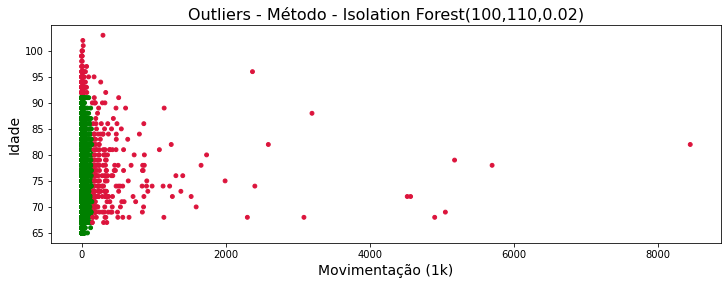

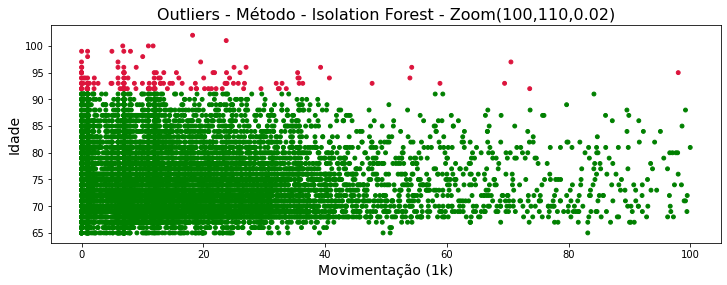

In [ ]:
# Executa com parâmetros n_estimator = 100 max_samples = 110 contamination 0.02
parametros= '(100,110,0.02)'
start_time = time.time()

iso_forest = IsolationForest(n_estimators=100 ,max_samples=110,
                             contamination=0.02,random_state=rd_seed)
# print(iso_forest)



iso_df = fit_predict_model(modelo=iso_forest, coluna='idade', dado=bpc)
outliers_idade = iso_df.query('Predictions == -1').index.values
iso_forest = IsolationForest(n_estimators=100 ,max_samples=110,
                             contamination=0.02,random_state=rd_seed)
iso_df = fit_predict_model(modelo=iso_forest, coluna='total_mov', dado=bpc)

outliers_mov = iso_df.query('Predictions == -1').index.values

# marca outliers
iso_df['Predictions'] = 0
iso_df.at[outliers_idade, 'Predictions'] = 1
iso_df.at[outliers_mov, 'Predictions'] = 1

t = time.time() - start_time
print("--- %s segundos ---" % (t))
tempo_exec += t


#Plota resultado
subbpc = iso_df.query('Predictions == 1')

# Mostra qtd e percentuais
print('Número total de registros de Outliers [idade]:', np.size(outliers_idade), '(', 
      format(np.size(outliers_idade)/iso_df.shape[0], '.2%'),')')
print('Número total de registros de Outliers [total_mov]:', np.size(outliers_mov),'(', 
      format(np.size(outliers_mov)/iso_df.shape[0], '.2%'), ')')
print('Número de registros de Outliers: ', subbpc.shape[0])
print('Número de beneficiários/benefícios verificados: ', iso_df.shape[0])
print('Percentual de de Outliers: ', 
      format(subbpc.shape[0]/iso_df.shape[0], '.2%'))

iso_df['total_mov'] = iso_df['total_mov'] / 1000
plota_anomalias(iso_df, titulo="Outliers - Método - Isolation Forest"+parametros, 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")

iso_df2 = iso_df.query('total_mov < 100')
plota_anomalias(iso_df2, titulo="Outliers - Método - Isolation Forest - Zoom"+parametros, 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")


### **5 - n_estimators = 100 e max_samples = 110 contamination = 0.02 (idade) 0.04 (movimentação)**

--- 2.062472105026245 segundos ---
Número total de registros de Outliers [idade]: 165 ( 1.19% )
Número total de registros de Outliers [total_mov]: 549 ( 3.97% )
Número de registros de Outliers:  708
Número de beneficiários/benefícios verificados:  13834
Percentual de de Outliers:  5.12%


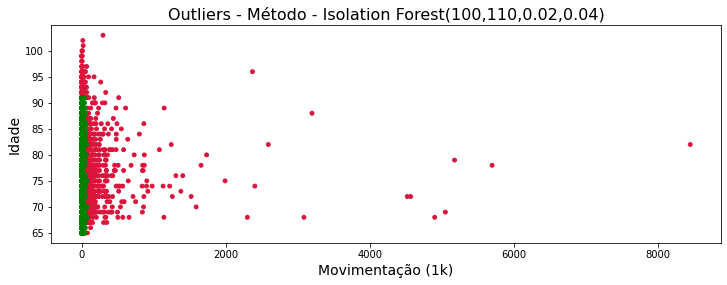

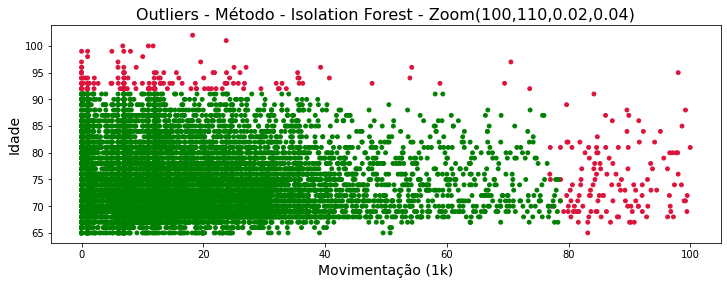

In [ ]:
# Executa com parâmetros n_estimator = 100 max_samples = 110 contamination diverso
parametros= '(100,110,0.02,0.04)'
start_time = time.time()

iso_forest = IsolationForest(n_estimators=100 ,max_samples=110,
                             contamination=0.02,random_state=rd_seed)
# print(iso_forest)



iso_df = fit_predict_model(modelo=iso_forest, coluna='idade', dado=bpc)
outliers_idade = iso_df.query('Predictions == -1').index.values
iso_forest = IsolationForest(n_estimators=100 ,max_samples=110,
                             contamination=0.04,random_state=rd_seed)
iso_df = fit_predict_model(modelo=iso_forest, coluna='total_mov', dado=bpc)

outliers_mov = iso_df.query('Predictions == -1').index.values

# marca outliers
iso_df['Predictions'] = 0
iso_df.at[outliers_idade, 'Predictions'] = 1
iso_df.at[outliers_mov, 'Predictions'] = 1

t = time.time() - start_time
print("--- %s segundos ---" % (t))
tempo_exec += t


#Plota resultado
subbpc = iso_df.query('Predictions == 1')

# Mostra qtd e percentuais
print('Número total de registros de Outliers [idade]:', np.size(outliers_idade), '(', 
      format(np.size(outliers_idade)/iso_df.shape[0], '.2%'),')')
print('Número total de registros de Outliers [total_mov]:', np.size(outliers_mov),'(', 
      format(np.size(outliers_mov)/iso_df.shape[0], '.2%'), ')')
print('Número de registros de Outliers: ', subbpc.shape[0])
print('Número de beneficiários/benefícios verificados: ', iso_df.shape[0])
print('Percentual de de Outliers: ', 
      format(subbpc.shape[0]/iso_df.shape[0], '.2%'))

iso_df['total_mov'] = iso_df['total_mov'] / 1000
plota_anomalias(iso_df, titulo="Outliers - Método - Isolation Forest"+parametros, 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")

iso_df2 = iso_df.query('total_mov < 100')
plota_anomalias(iso_df2, titulo="Outliers - Método - Isolation Forest - Zoom"+parametros, 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")


### **6 - n_estimators = 100 e max_samples = 110 contamination = 0.02 (idade) 0.05 (movimentação)**

--- 2.0933101177215576 segundos ---
Número total de registros de Outliers [idade]: 165 ( 1.19% )
Número total de registros de Outliers [total_mov]: 691 ( 4.99% )
Número de registros de Outliers:  847
Número de beneficiários/benefícios verificados:  13834
Percentual de de Outliers:  6.12%


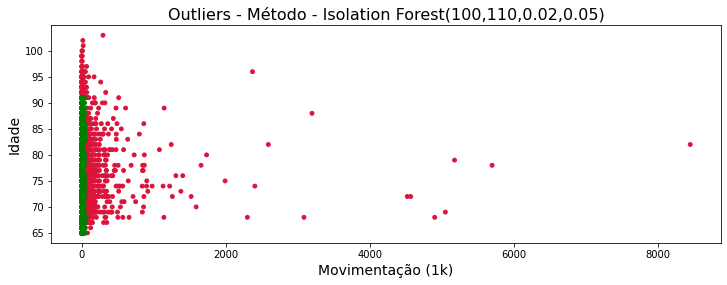

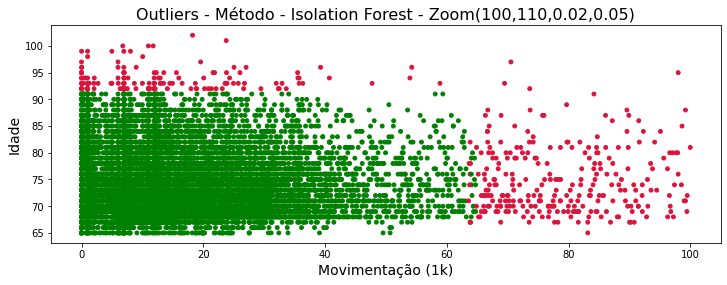

In [ ]:


# Executa com parâmetros n_estimator = 100 max_samples = 110 contamination diverso
parametros= '(100,110,0.02,0.05)'
start_time = time.time()

iso_forest = IsolationForest(n_estimators=100 ,max_samples=110,
                             contamination=0.02,random_state=rd_seed)
# print(iso_forest)



iso_df = fit_predict_model(modelo=iso_forest, coluna='idade', dado=bpc)
outliers_idade = iso_df.query('Predictions == -1').index.values
iso_forest = IsolationForest(n_estimators=100 ,max_samples=110,
                             contamination=0.05,random_state=rd_seed)
iso_df = fit_predict_model(modelo=iso_forest, coluna='total_mov', dado=bpc)

outliers_mov = iso_df.query('Predictions == -1').index.values

# marca outliers
iso_df['Predictions'] = 0
iso_df.at[outliers_idade, 'Predictions'] = 1
iso_df.at[outliers_mov, 'Predictions'] = 1

t = time.time() - start_time
print("--- %s segundos ---" % (t))
tempo_exec += t

tempos.append(['IsolationForest', tempo_exec/6])


#Plota resultado
subbpc = iso_df.query('Predictions == 1')

# Mostra qtd e percentuais
print('Número total de registros de Outliers [idade]:', np.size(outliers_idade), '(', 
      format(np.size(outliers_idade)/iso_df.shape[0], '.2%'),')')
print('Número total de registros de Outliers [total_mov]:', np.size(outliers_mov),'(', 
      format(np.size(outliers_mov)/iso_df.shape[0], '.2%'), ')')
print('Número de registros de Outliers: ', subbpc.shape[0])
print('Número de beneficiários/benefícios verificados: ', iso_df.shape[0])
print('Percentual de de Outliers: ', 
      format(subbpc.shape[0]/iso_df.shape[0], '.2%'))

iso_df['total_mov'] = iso_df['total_mov'] / 1000
plota_anomalias(iso_df, titulo="Outliers - Método - Isolation Forest"+parametros, 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")

iso_df2 = iso_df.query('total_mov < 100')
plota_anomalias(iso_df2, titulo="Outliers - Método - Isolation Forest - Zoom"+parametros, 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")


    


## **Método Z-score**

--- 0.011233329772949219 segundos ---
Número total de registros de Outliers [idade]: 113 ( 0.82% )
Número total de registros de Outliers [total_mov]: 67 ( 0.48% )
Número de registros de Outliers:  179
Número de beneficiários/benefícios verificados:  13834
Percentual de de Outliers:  1.29%


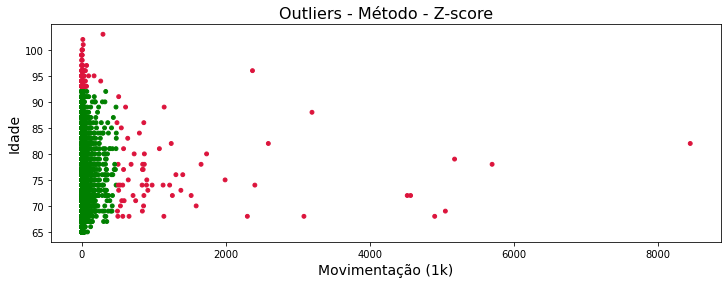

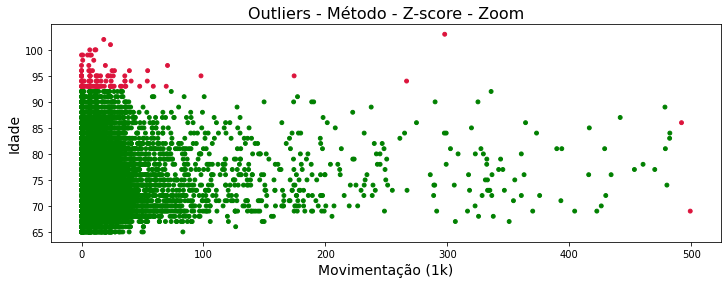

In [ ]:

tempo_exec = 0
start_time = time.time()

media = bpc.mean()

# idade
zscore = (bpc['idade'] - media['idade'])/bpc['idade'].std()
outliers_idade = np.where((zscore >= 3) | (zscore < -3))


# movimentação
zscore = (bpc['total_mov'] - media['total_mov'])/bpc['total_mov'].std()
outliers_mov = np.where((zscore >= 3) | (zscore < -3))


# marca outliers
zs_df = bpc.copy()
zs_df['Predictions'] = 0
zs_df.at[outliers_idade[0], 'Predictions'] = 1
zs_df.at[outliers_mov[0], 'Predictions'] = 1

t = time.time() - start_time
print("--- %s segundos ---" % (t))
tempo_exec += t
tempos.append(['Zscore', tempo_exec])
#print(tempos)

#Plota resultado
subbpc = zs_df.query('Predictions == 1')

# Mostra qtd e percentuais
print('Número total de registros de Outliers [idade]:', np.size(outliers_idade[0]), '(', 
      format(np.size(outliers_idade[0])/zs_df.shape[0], '.2%'),')')
print('Número total de registros de Outliers [total_mov]:', np.size(outliers_mov[0]),'(', 
      format(np.size(outliers_mov[0])/zs_df.shape[0], '.2%'), ')')
print('Número de registros de Outliers: ', subbpc.shape[0])
print('Número de beneficiários/benefícios verificados: ', zs_df.shape[0])
print('Percentual de de Outliers: ', 
      format(subbpc.shape[0]/zs_df.shape[0], '.2%'))

zs_df['total_mov'] = zs_df['total_mov'] / 1000
plota_anomalias(zs_df, titulo="Outliers - Método - Z-score", 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")

zs_df2 = zs_df.query('total_mov < 500')
plota_anomalias(zs_df2, titulo="Outliers - Método - Z-score - Zoom", 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")


**Z-Score alterando parâmetro**

--- 0.012768983840942383 seconds ---
Número total de registros de Outliers [idade]: 113 ( 0.82% )
Número total de registros de Outliers [total_mov]: 773 ( 5.59% )
Número de registros de Outliers:  878
Número de beneficiários/benefícios verificados:  13834
Percentual de de Outliers:  6.35%


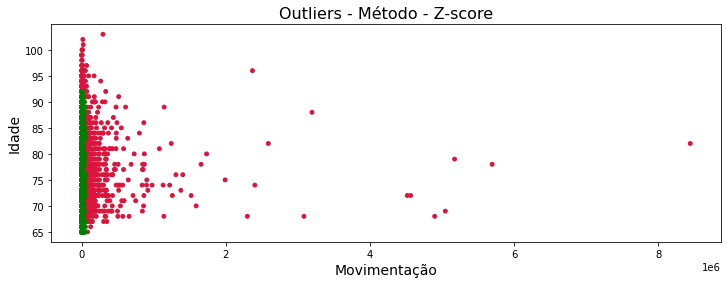

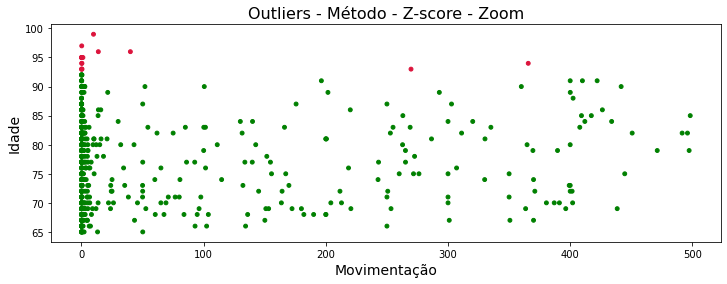

In [ ]:
start_time = time.time()
media = bpc.mean()

# idade
zscore = (bpc['idade'] - media['idade'])/bpc['idade'].std()
outliers_idade = np.where((zscore >= 3) | (zscore < -3))

# movimentação
zscore = (bpc['total_mov'] - media['total_mov'])/bpc['total_mov'].std()
outliers_mov = np.where((zscore >= 0.2) | (zscore < -0.2))

# marca outliers
zs_df = bpc.copy()
zs_df['Predictions'] = 0
zs_df.at[outliers_idade[0], 'Predictions'] = 1
zs_df.at[outliers_mov[0], 'Predictions'] = 1

print("--- %s seconds ---" % (time.time() - start_time))

#Plota resultado
subbpc = zs_df.query('Predictions == 1')

# Mostra qtd e percentuais
print('Número total de registros de Outliers [idade]:', np.size(outliers_idade[0]), '(', 
      format(np.size(outliers_idade[0])/zs_df.shape[0], '.2%'),')')
print('Número total de registros de Outliers [total_mov]:', np.size(outliers_mov[0]),'(', 
      format(np.size(outliers_mov[0])/zs_df.shape[0], '.2%'), ')')
print('Número de registros de Outliers: ', subbpc.shape[0])
print('Número de beneficiários/benefícios verificados: ', zs_df.shape[0])
print('Percentual de de Outliers: ', 
      format(subbpc.shape[0]/zs_df.shape[0], '.2%'))
plota_anomalias(zs_df, titulo="Outliers - Método - Z-score", 
                x="total_mov", y="idade", xl="Movimentação", yl="Idade")

zs_df2 = zs_df.query('total_mov < 500')
plota_anomalias(zs_df2, titulo="Outliers - Método - Z-score - Zoom", 
                x="total_mov", y="idade", xl="Movimentação", yl="Idade")


## **Método MAD()**

**Rotina do método**

In [ ]:
# Método MAD
def mad_method(df, variable_name, threshold=3):
    # Recebe dois parâmetros: dataframe & variável de interesse como string
    columns = df.columns
    med = np.median(df, axis = 0)
    mad = np.abs(stats.median_absolute_deviation(df))
    outlier = []
    index=0
    for item in range(len(columns)):
        if columns[item] == variable_name:
            index = item
    for i, v in enumerate(df.loc[:,variable_name]):
        # print(v)
        t = abs((v-med[index])/mad[index])
        #print(v - med[index])
        if t > threshold:
            outlier.append(i)
        else:
            continue
    return outlier

**Aplicação**

Número total de registros de Outliers [idade]: 235 ( 1.70% )
Número total de registros de Outliers [total_mov]: 836 ( 6.04% )
--- 0.04727649688720703 segundos ---
[['MAD', 0.04727649688720703]]
Número de registros de Outliers:  1055
Número de beneficiários/benefícios verificados:  13834
Percentual de de Outliers:  7.63%


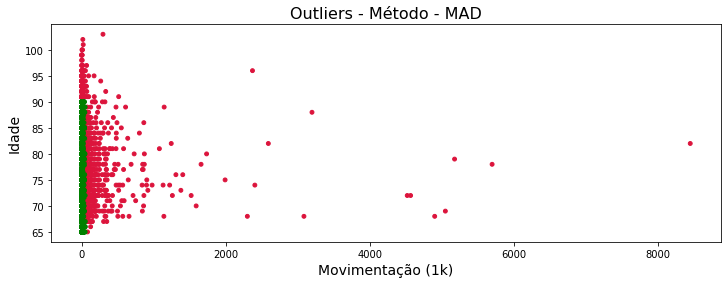

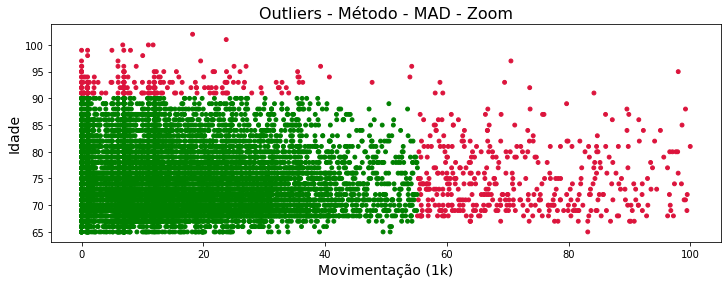

In [ ]:
# aplica MAD()

tempo_exec = 0
start_time = time.time()

outliers_idade = mad_method(bpc, variable_name='idade', threshold=3)
print('Número total de registros de Outliers [idade]:', np.size(outliers_idade), 
      '(', format(np.size(outliers_idade)/bpc.shape[0], '.2%'), ')')


outliers_mov = mad_method(bpc, variable_name='total_mov', threshold=3)
print('Número total de registros de Outliers [total_mov]:', np.size(outliers_mov), 
      '(', format(np.size(outliers_mov)/bpc.shape[0], '.2%'), ')')



mad_df = bpc.copy()
mad_df['Predictions'] = 0
mad_df.at[outliers_idade, 'Predictions'] = 1
mad_df.at[outliers_mov, 'Predictions'] = 1

t = time.time() - start_time
print("--- %s segundos ---" % (t))
tempo_exec += t
tempos.append(['MAD', tempo_exec])
print(tempos)



#Plota resultado
subbpc = mad_df.query('Predictions == 1')


# Mostra qtd e percentuais
print('Número de registros de Outliers: ', subbpc.shape[0])
print('Número de beneficiários/benefícios verificados: ', mad_df.shape[0])
print('Percentual de de Outliers: ', 
       format(subbpc.shape[0]/mad_df.shape[0], '.2%'))


mad_df['total_mov'] = mad_df['total_mov'] / 1000
plota_anomalias(mad_df, titulo="Outliers - Método - MAD", 
              x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")

mad_df2 = mad_df.query('total_mov < 100')
plota_anomalias(mad_df2, titulo="Outliers - Método - MAD - Zoom", 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")



**Implementação direta no dataframe**

--- 0.018155574798583984 segundos ---
Número total de registros de Outliers [idade]: 235 ( 1.70% )
Número total de registros de Outliers [total_mov]: 836 ( 6.04% )
Número de registros de Outliers:  1055
Número de beneficiários/benefícios verificados:  13834
Percentual de de Outliers:  7.63%


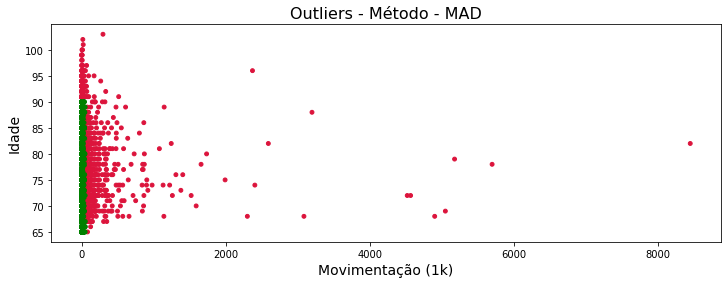

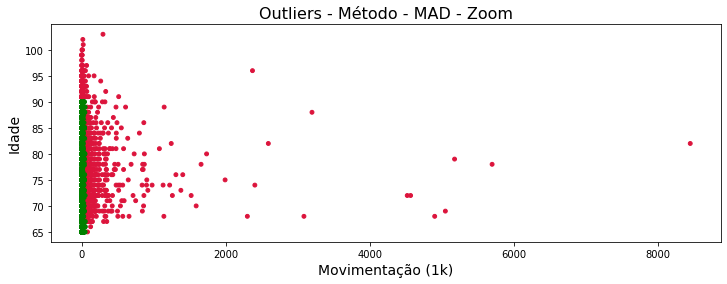

In [ ]:
# calcula mediana
tempo_exec = 0
start_time = time.time()

mediana = bpc.median()

# calcula mediana dos desvio padrões absolutos
mad = stats.median_absolute_deviation(bpc['idade'])
# mad de idade
mad_idade = (bpc['idade'] - mediana['idade'])/ mad
outliers_idade = np.where((mad_idade >= 3) | (mad_idade < -3))

# mad de movimentação
# calcula mediana dos desvio padrões absolutos
mad = stats.median_absolute_deviation(bpc['total_mov'])
mad_mov = (bpc['total_mov'] - mediana['total_mov'])/ mad
outliers_mov = np.where((mad_mov >= 3) | (mad_mov < -3))

# marca outliers
mad_df = bpc.copy()
mad_df['Predictions'] = 0
mad_df.at[outliers_idade[0], 'Predictions'] = 1
mad_df.at[outliers_mov[0], 'Predictions'] = 1

print("--- %s segundos ---" % (time.time() - start_time))

#Plota resultado
subbpc = mad_df.query('Predictions == 1')

# Mostra qtd e percentuais
print('Número total de registros de Outliers [idade]:', np.size(outliers_idade[0]), '(', 
      format(np.size(outliers_idade[0])/mad_df.shape[0], '.2%'),')')
print('Número total de registros de Outliers [total_mov]:', np.size(outliers_mov[0]),'(', 
      format(np.size(outliers_mov[0])/mad_df.shape[0], '.2%'), ')')
print('Número de registros de Outliers: ', subbpc.shape[0])
print('Número de beneficiários/benefícios verificados: ', mad_df.shape[0])
print('Percentual de de Outliers: ', 
      format(subbpc.shape[0]/mad_df.shape[0], '.2%'))

mad_df['total_mov'] = mad_df['total_mov'] / 1000
plota_anomalias(mad_df, titulo="Outliers - Método - MAD", 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")

mad_df2 = mad_df.query('total_mov < 100000')
plota_anomalias(mad_df2, titulo="Outliers - Método - MAD - Zoom", 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")




## **Método DBSCAN**

### **1 - DBSCAN - por variável - idade (0.17,100) - total_mov (0.17, 100)**

--- 3.516385555267334 segundos ---
Número de registros de Outliers [idade]:  47 ( 0.34% )
Número de registros de Outliers [total_mov]:  205 ( 1.48% )
Número de registros de Outliers:  250
Número de beneficiários/benefícios verificados:  13834
Percentual de de Outliers:  1.81%


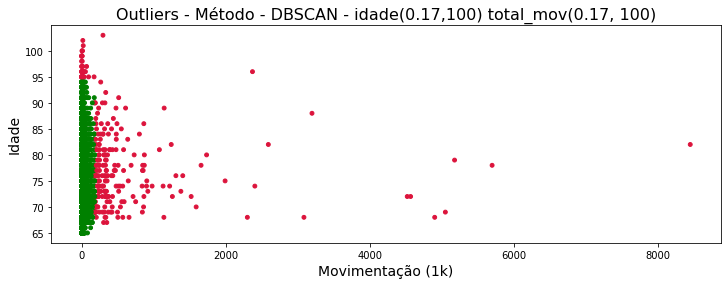

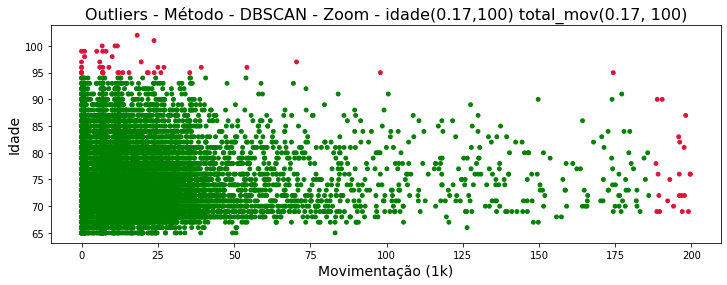

In [ ]:

# Padronização
parametros = ' - idade(0.17,100) total_mov(0.17, 100)'
dbscan_df = bpc_zscore.copy()
del dbscan_df['numbenef']

tempo_exec = 0
start_time = time.time()

dbscan_model = DBSCAN(eps=0.17, min_samples=100)
dbscan_df = fit_predict_model(modelo=dbscan_model, dado=dbscan_df, 
                               coluna='idade')
anomalias_index_idade = dbscan_df.query('Predictions == -1').index.values
# print(anomalias_index_idade)

dbscan_df['Predictions'] = 0
dbscan_model = DBSCAN(eps=0.17, min_samples=100)
dbscan_df = fit_predict_model(modelo=dbscan_model, dado=dbscan_df, 
                               coluna='total_mov')
anomalias_index_mov = dbscan_df.query('Predictions == -1').index.values

dbscan_df = bpc.copy()
dbscan_df['Predictions'] = 0
dbscan_df.at[anomalias_index_idade, 'Predictions'] = 1
dbscan_df.at[anomalias_index_mov, 'Predictions'] = 1

t = time.time() - start_time
tempo_exec += t
print("--- %s segundos ---" % (t))


#Plota resultado
subbpc = dbscan_df.query('Predictions == 1')

# Mostra qtd e percentuais
print('Número de registros de Outliers [idade]: ', 
      np.size(anomalias_index_idade), '(', 
      format(np.size(anomalias_index_idade)/dbscan_df.shape[0], '.2%'), ')')
print('Número de registros de Outliers [total_mov]: ', 
      np.size(anomalias_index_mov), '(', 
      format(np.size(anomalias_index_mov)/dbscan_df.shape[0], '.2%'), ')')
print('Número de registros de Outliers: ', subbpc.shape[0])
print('Número de beneficiários/benefícios verificados: ', dbscan_df.shape[0])
print('Percentual de de Outliers: ', 
       format(subbpc.shape[0]/dbscan_df.shape[0], '.2%'))

dbscan_df['total_mov'] = dbscan_df['total_mov'] / 1000
plota_anomalias(dbscan_df, titulo="Outliers - Método - DBSCAN"+parametros, 
              x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")

dbscan_df2 = dbscan_df.query('total_mov < 200')
plota_anomalias(dbscan_df2, titulo="Outliers - Método - DBSCAN - Zoom"+parametros, 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")

### **2 - DBSCAN - por variável - idade (0.17,100) - total_mov (0.05, 100)** 

--- 1.2105066776275635 segundos ---
Número de registros de Outliers [idade]:  47 ( 0.34% )
Número de registros de Outliers [total_mov]:  439 ( 3.17% )
Número de registros de Outliers:  482
Número de beneficiários/benefícios verificados:  13834
Percentual de de Outliers:  3.48%


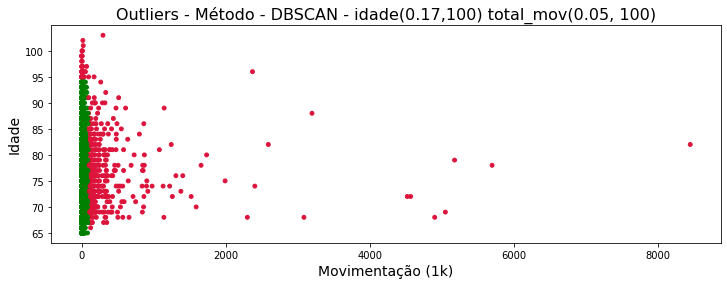

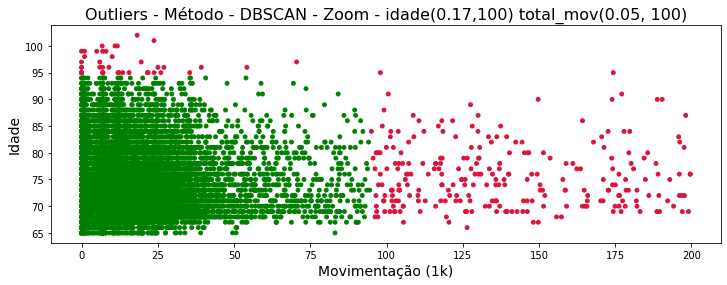

In [ ]:
# Padronização
parametros = ' - idade(0.17,100) total_mov(0.05, 100)'
dbscan_df = bpc_zscore.copy()
del dbscan_df['numbenef']

start_time = time.time()

dbscan_model = DBSCAN(eps=0.17, min_samples=100)
dbscan_df = fit_predict_model(modelo=dbscan_model, dado=dbscan_df, 
                               coluna='idade')
anomalias_index_idade = dbscan_df.query('Predictions == -1').index.values


dbscan_df['Predictions'] = 0
dbscan_model = DBSCAN(eps=0.05, min_samples=100)
dbscan_df = fit_predict_model(modelo=dbscan_model, dado=dbscan_df, 
                               coluna='total_mov')
anomalias_index_mov = dbscan_df.query('Predictions == -1').index.values

dbscan_df = bpc.copy()
dbscan_df['Predictions'] = 0
dbscan_df.at[anomalias_index_idade, 'Predictions'] = 1
dbscan_df.at[anomalias_index_mov, 'Predictions'] = 1

t = time.time() - start_time
tempo_exec += t
print("--- %s segundos ---" % (t))

#Plota resultado
subbpc = dbscan_df.query('Predictions == 1')

# Mostra qtd e percentuais
print('Número de registros de Outliers [idade]: ', 
      np.size(anomalias_index_idade), '(', 
      format(np.size(anomalias_index_idade)/dbscan_df.shape[0], '.2%'), ')')
print('Número de registros de Outliers [total_mov]: ', 
      np.size(anomalias_index_mov), '(', 
      format(np.size(anomalias_index_mov)/dbscan_df.shape[0], '.2%'), ')')
print('Número de registros de Outliers: ', subbpc.shape[0])
print('Número de beneficiários/benefícios verificados: ', dbscan_df.shape[0])
print('Percentual de de Outliers: ', 
       format(subbpc.shape[0]/dbscan_df.shape[0], '.2%'))

dbscan_df['total_mov'] = dbscan_df['total_mov'] / 1000
plota_anomalias(dbscan_df, titulo="Outliers - Método - DBSCAN"+parametros, 
              x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")

dbscan_df2 = dbscan_df.query('total_mov < 200')
plota_anomalias(dbscan_df2, titulo="Outliers - Método - DBSCAN - Zoom"+parametros, 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")

### **3 - DBSCAN - por variável - idade (0.17,200) - total_mov (0.17, 200)** 

--- 2.077751636505127 segundos ---
Número de registros de Outliers [idade]:  113 ( 0.82% )
Número de registros de Outliers [total_mov]:  301 ( 2.18% )
Número de registros de Outliers:  410
Número de beneficiários/benefícios verificados:  13834
Percentual de de Outliers:  2.96%


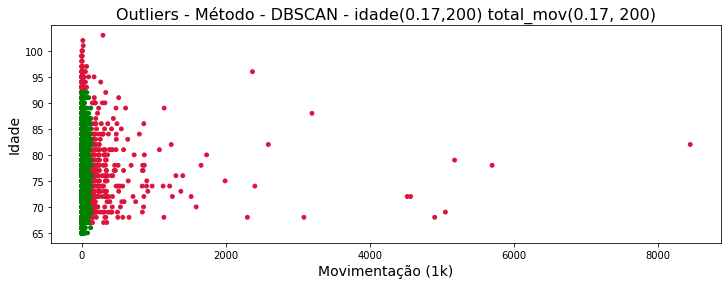

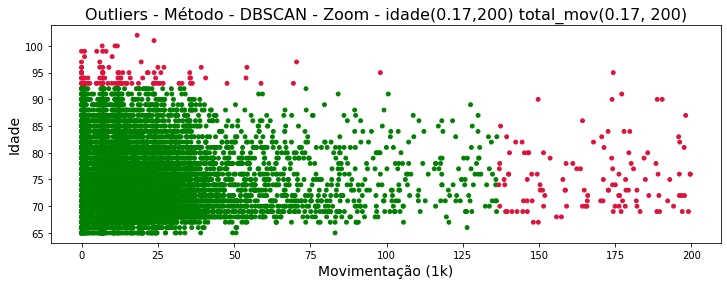

In [ ]:
# Padronização
parametros = ' - idade(0.17,200) total_mov(0.17, 200)'
dbscan_df = bpc_zscore.copy()
del dbscan_df['numbenef']

start_time = time.time()

dbscan_model = DBSCAN(eps=0.17, min_samples=200)
dbscan_df = fit_predict_model(modelo=dbscan_model, dado=dbscan_df, 
                               coluna='idade')
anomalias_index_idade = dbscan_df.query('Predictions == -1').index.values


dbscan_df['Predictions'] = 0
dbscan_model = DBSCAN(eps=0.17, min_samples=200)
dbscan_df = fit_predict_model(modelo=dbscan_model, dado=dbscan_df, 
                               coluna='total_mov')
anomalias_index_mov = dbscan_df.query('Predictions == -1').index.values

dbscan_df = bpc.copy()
dbscan_df['Predictions'] = 0
dbscan_df.at[anomalias_index_idade, 'Predictions'] = 1
dbscan_df.at[anomalias_index_mov, 'Predictions'] = 1

t = time.time() - start_time
tempo_exec += t
print("--- %s segundos ---" % (t))


#Plota resultado
subbpc = dbscan_df.query('Predictions == 1')

# Mostra qtd e percentuais
print('Número de registros de Outliers [idade]: ', 
      np.size(anomalias_index_idade), '(', 
      format(np.size(anomalias_index_idade)/dbscan_df.shape[0], '.2%'), ')')
print('Número de registros de Outliers [total_mov]: ', 
      np.size(anomalias_index_mov), '(', 
      format(np.size(anomalias_index_mov)/dbscan_df.shape[0], '.2%'), ')')
print('Número de registros de Outliers: ', subbpc.shape[0])
print('Número de beneficiários/benefícios verificados: ', dbscan_df.shape[0])
print('Percentual de de Outliers: ', 
       format(subbpc.shape[0]/dbscan_df.shape[0], '.2%'))

dbscan_df['total_mov'] = dbscan_df['total_mov'] / 1000
plota_anomalias(dbscan_df, titulo="Outliers - Método - DBSCAN"+parametros, 
              x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")

dbscan_df2 = dbscan_df.query('total_mov < 200')
plota_anomalias(dbscan_df2, titulo="Outliers - Método - DBSCAN - Zoom"+parametros, 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")

### **4 - DBSCAN - por variável - idade (0.17,500) - total_mov (0.17, 500)** 

--- 2.4939117431640625 segundos ---
Número de registros de Outliers [idade]:  565 ( 4.08% )
Número de registros de Outliers [total_mov]:  392 ( 2.83% )
Número de registros de Outliers:  937
Número de beneficiários/benefícios verificados:  13834
Percentual de de Outliers:  6.77%


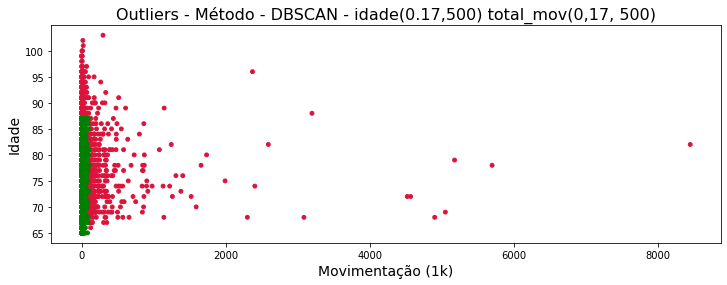

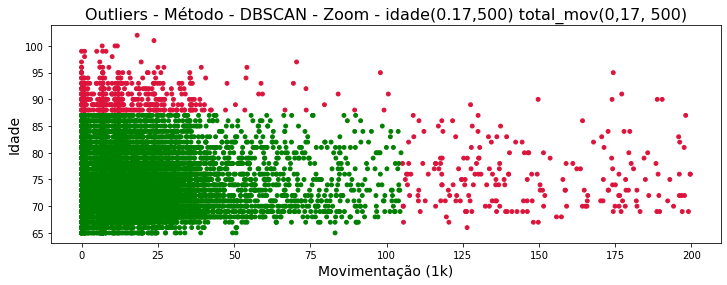

In [ ]:
# Padronização
parametros = ' - idade(0.17,500) total_mov(0,17, 500)'
dbscan_df = bpc_zscore.copy()
del dbscan_df['numbenef']

start_time = time.time()

dbscan_model = DBSCAN(eps=0.17, min_samples=500)
dbscan_df = fit_predict_model(modelo=dbscan_model, dado=dbscan_df, 
                               coluna='idade')
anomalias_index_idade = dbscan_df.query('Predictions == -1').index.values

dbscan_df['Predictions'] = 0
dbscan_model = DBSCAN(eps=0.17, min_samples=500)
dbscan_df = fit_predict_model(modelo=dbscan_model, dado=dbscan_df, 
                               coluna='total_mov')
anomalias_index_mov = dbscan_df.query('Predictions == -1').index.values

dbscan_df = bpc.copy()
dbscan_df['Predictions'] = 0
dbscan_df.at[anomalias_index_idade, 'Predictions'] = 1
dbscan_df.at[anomalias_index_mov, 'Predictions'] = 1

t = time.time() - start_time
tempo_exec += t
print("--- %s segundos ---" % (t))


#Plota resultado
subbpc = dbscan_df.query('Predictions == 1')

# Mostra qtd e percentuais
print('Número de registros de Outliers [idade]: ', 
      np.size(anomalias_index_idade), '(', 
      format(np.size(anomalias_index_idade)/dbscan_df.shape[0], '.2%'), ')')
print('Número de registros de Outliers [total_mov]: ', 
      np.size(anomalias_index_mov), '(', 
      format(np.size(anomalias_index_mov)/dbscan_df.shape[0], '.2%'), ')')
print('Número de registros de Outliers: ', subbpc.shape[0])
print('Número de beneficiários/benefícios verificados: ', dbscan_df.shape[0])
print('Percentual de de Outliers: ', 
       format(subbpc.shape[0]/dbscan_df.shape[0], '.2%'))

dbscan_df['total_mov'] = dbscan_df['total_mov'] / 1000
plota_anomalias(dbscan_df, titulo="Outliers - Método - DBSCAN"+parametros, 
              x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")

dbscan_df2 = dbscan_df.query('total_mov < 200')
plota_anomalias(dbscan_df2, titulo="Outliers - Método - DBSCAN - Zoom"+parametros, 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")

### **5 - DBSCAN - eps=0.17 min_samples=100**

--- 0.6693363189697266 segundos ---
Número de registros de Outliers:  607
Número de beneficiários/benefícios verificados:  13834
Percentual de de Outliers:  4.39%


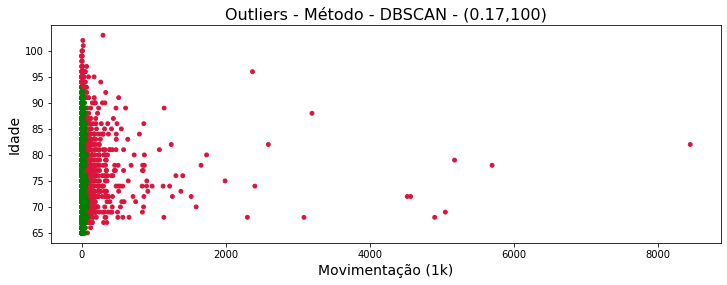

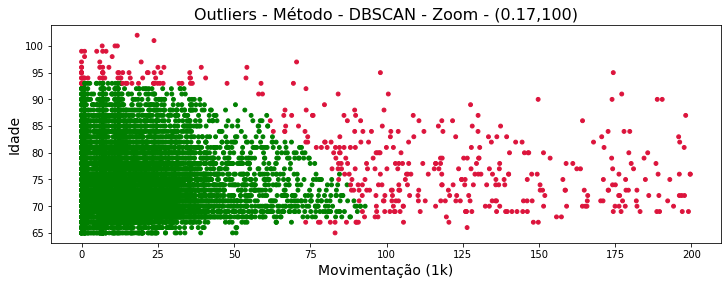

In [ ]:
# Padronização
parametros = ' - (0.17,100)'
dbscan_df = bpc_zscore.copy()
del dbscan_df['numbenef']
#print(dbscan_df.describe())

start_time = time.time()

dbscan_model = DBSCAN(eps=0.17, min_samples=100)
dbscan_df['Predictions'] = dbscan_model.fit_predict(dbscan_df)
anomalias_index = dbscan_df.query('Predictions == -1').index.values

dbscan_df = bpc.copy()
dbscan_df['Predictions'] = 0
dbscan_df.at[anomalias_index, 'Predictions'] = 1

t = time.time() - start_time
tempo_exec += t
print("--- %s segundos ---" % (t))

#Plota resultado
subbpc = dbscan_df.query('Predictions == 1')

# Mostra qtd e percentuais
print('Número de registros de Outliers: ', subbpc.shape[0])
print('Número de beneficiários/benefícios verificados: ', dbscan_df.shape[0])
print('Percentual de de Outliers: ', 
       format(subbpc.shape[0]/dbscan_df.shape[0], '.2%'))

dbscan_df['total_mov'] = dbscan_df['total_mov'] / 1000
plota_anomalias(dbscan_df, titulo="Outliers - Método - DBSCAN"+parametros, 
              x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")

dbscan_df2 = dbscan_df.query('total_mov < 200')
plota_anomalias(dbscan_df2, titulo="Outliers - Método - DBSCAN - Zoom"+parametros, 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")

### **6 - DBSCAN - eps=0.17 min_samples=150**

--- 0.5414679050445557 segundos ---
Número de registros de Outliers:  738
Número de beneficiários/benefícios verificados:  13834
Percentual de de Outliers:  5.33%


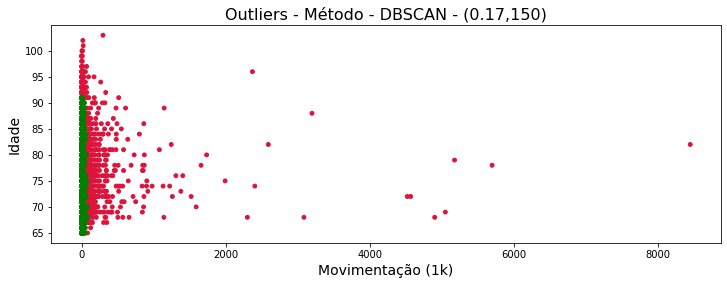

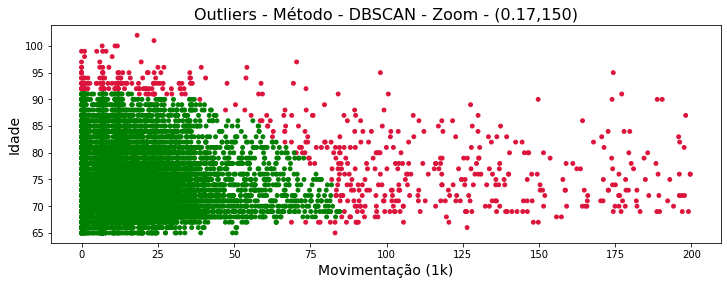

In [ ]:
# Padronização
parametros = ' - (0.17,150)'
dbscan_df = bpc_zscore.copy()
del dbscan_df['numbenef']
#print(dbscan_df.describe())

start_time = time.time()

dbscan_model = DBSCAN(eps=0.17, min_samples=150)
dbscan_df['Predictions'] = dbscan_model.fit_predict(dbscan_df)
anomalias_index = dbscan_df.query('Predictions == -1').index.values

dbscan_df = bpc.copy()
dbscan_df['Predictions'] = 0
dbscan_df.at[anomalias_index, 'Predictions'] = 1

t = time.time() - start_time
tempo_exec += t
print("--- %s segundos ---" % (t))

#Plota resultado
subbpc = dbscan_df.query('Predictions == 1')

# Mostra qtd e percentuais
print('Número de registros de Outliers: ', subbpc.shape[0])
print('Número de beneficiários/benefícios verificados: ', dbscan_df.shape[0])
print('Percentual de de Outliers: ', 
       format(subbpc.shape[0]/dbscan_df.shape[0], '.2%'))

dbscan_df['total_mov'] = dbscan_df['total_mov'] / 1000
plota_anomalias(dbscan_df, titulo="Outliers - Método - DBSCAN"+parametros, 
              x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")

dbscan_df2 = dbscan_df.query('total_mov < 200')
plota_anomalias(dbscan_df2, titulo="Outliers - Método - DBSCAN - Zoom"+parametros, 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")

### **7 - DBSCAN - eps=0.1 min_samples=35**

--- 0.33665919303894043 segundos ---
Número de registros de Outliers:  690
Número de beneficiários/benefícios verificados:  13834
Percentual de de Outliers:  4.99%


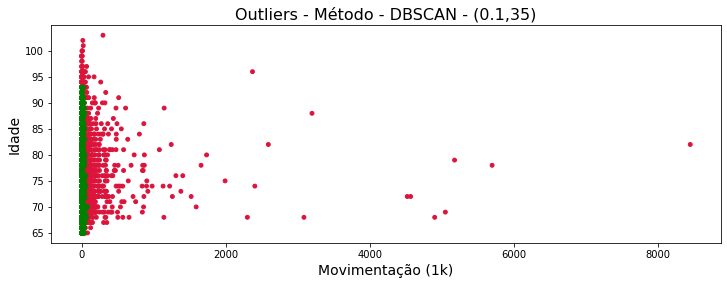

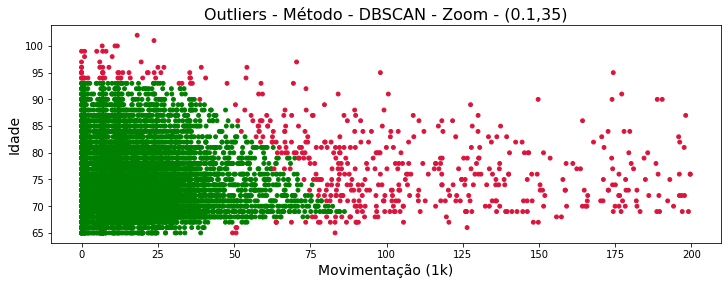

In [ ]:
# Padronização
parametros = ' - (0.1,35)'
dbscan_df = bpc_zscore.copy()
del dbscan_df['numbenef']
#print(dbscan_df.describe())

start_time = time.time()

dbscan_model = DBSCAN(eps=0.1, min_samples=35)
dbscan_df['Predictions'] = dbscan_model.fit_predict(dbscan_df)
anomalias_index = dbscan_df.query('Predictions == -1').index.values

dbscan_df = bpc.copy()
dbscan_df['Predictions'] = 0
dbscan_df.at[anomalias_index, 'Predictions'] = 1

t = time.time() - start_time
tempo_exec += t
print("--- %s segundos ---" % (t))


#Plota resultado
subbpc = dbscan_df.query('Predictions == 1')

# Mostra qtd e percentuais
print('Número de registros de Outliers: ', subbpc.shape[0])
print('Número de beneficiários/benefícios verificados: ', dbscan_df.shape[0])
print('Percentual de de Outliers: ', 
       format(subbpc.shape[0]/dbscan_df.shape[0], '.2%'))

dbscan_df['total_mov'] = dbscan_df['total_mov'] / 1000
plota_anomalias(dbscan_df, titulo="Outliers - Método - DBSCAN"+parametros, 
              x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")

dbscan_df2 = dbscan_df.query('total_mov < 200')
plota_anomalias(dbscan_df2, titulo="Outliers - Método - DBSCAN - Zoom"+parametros, 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")

### **8 - DBSCAN - eps=0.05 min_samples=12**

--- 0.325319766998291 segundos ---
Número de registros de Outliers:  693
Número de beneficiários/benefícios verificados:  13834
Percentual de de Outliers:  5.01%


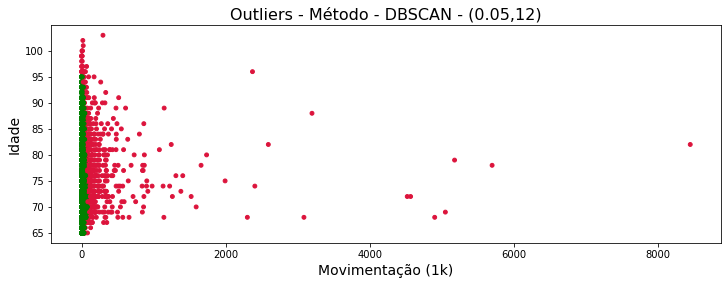

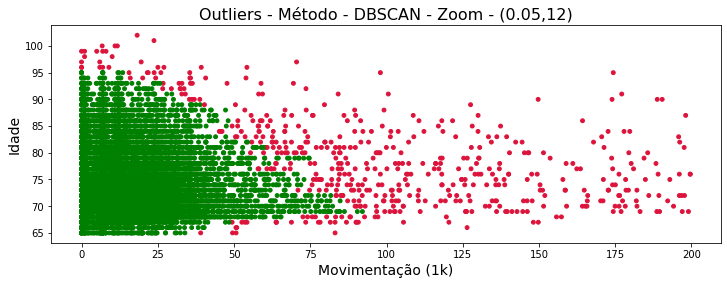

In [ ]:
# Padronização
parametros = ' - (0.05,12)'
dbscan_df = bpc_zscore.copy()
del dbscan_df['numbenef']
#print(dbscan_df.describe())

start_time = time.time()

dbscan_model = DBSCAN(eps=0.05, min_samples=12)
dbscan_df['Predictions'] = dbscan_model.fit_predict(dbscan_df)
anomalias_index = dbscan_df.query('Predictions == -1').index.values

dbscan_df = bpc.copy()
dbscan_df['Predictions'] = 0
dbscan_df.at[anomalias_index, 'Predictions'] = 1

t = time.time() - start_time
tempo_exec += t
print("--- %s segundos ---" % (t))
tempos.append(['DBSCAN', tempo_exec/8])

#Plota resultado
subbpc = dbscan_df.query('Predictions == 1')

# Mostra qtd e percentuais
print('Número de registros de Outliers: ', subbpc.shape[0])
print('Número de beneficiários/benefícios verificados: ', dbscan_df.shape[0])
print('Percentual de de Outliers: ', 
       format(subbpc.shape[0]/dbscan_df.shape[0], '.2%'))

dbscan_df['total_mov'] = dbscan_df['total_mov'] / 1000
plota_anomalias(dbscan_df, titulo="Outliers - Método - DBSCAN"+parametros, 
              x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")

dbscan_df2 = dbscan_df.query('total_mov < 200')
plota_anomalias(dbscan_df2, titulo="Outliers - Método - DBSCAN - Zoom"+parametros, 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")

### **Rodando DBSCAN normalizando (x - min) / (max - min) eps=0.1 min_samples=3000**

              idade     total_mov
count  13834.000000  13834.000000
mean       0.255517      0.003324
std        0.158789      0.018202
min        0.000000      0.000000
25%        0.131579      0.000709
50%        0.210526      0.001448
75%        0.342105      0.002959
max        1.000000      1.000000
--- 1.1282331943511963 segundos ---
Número de registros de Outliers:  21
Número de beneficiários/benefícios verificados:  13834
Percentual de de Outliers:  0.15%


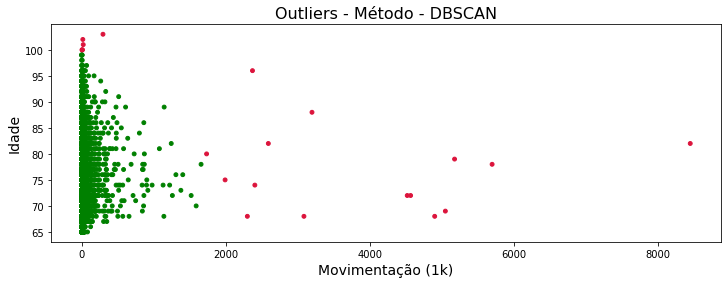

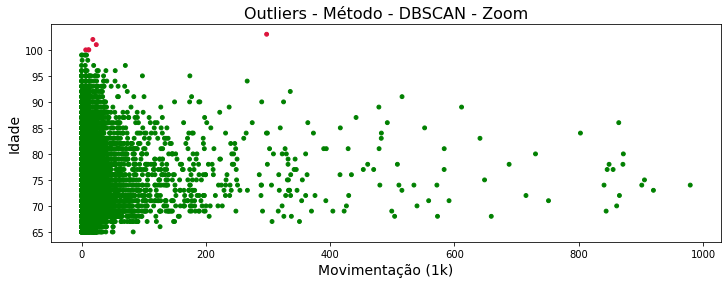

In [ ]:
dbscan_df = bpc.copy()

# Normalizando
dbscan_df = (dbscan_df - dbscan_df.min())/(dbscan_df.max() - dbscan_df.min())
del dbscan_df['numbenef']
print(dbscan_df.describe())

start_time = time.time()

dbscan_model = DBSCAN(eps=0.1, min_samples=100)
dbscan_df['Predictions'] = dbscan_model.fit_predict(dbscan_df)
anomalias_index = dbscan_df.query('Predictions == -1').index.values

dbscan_df = bpc.copy()
dbscan_df['Predictions'] = 0
dbscan_df.at[anomalias_index, 'Predictions'] = 1

t = time.time() - start_time
tempo_exec += t
print("--- %s segundos ---" % (t))


#Plota resultado
subbpc = dbscan_df.query('Predictions == 1')

# Mostra qtd e percentuais
print('Número de registros de Outliers: ', subbpc.shape[0])
print('Número de beneficiários/benefícios verificados: ', dbscan_df.shape[0])
print('Percentual de de Outliers: ', 
       format(subbpc.shape[0]/dbscan_df.shape[0], '.2%'))

dbscan_df['total_mov'] = dbscan_df['total_mov'] / 1000
plota_anomalias(dbscan_df, titulo="Outliers - Método - DBSCAN", 
              x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")

dbscan_df2 = dbscan_df.query('total_mov < 1000')
plota_anomalias(dbscan_df2, titulo="Outliers - Método - DBSCAN - Zoom", 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")

## **Método Local Outlier Factor (LOF):**

### **1 - LOF - n_neighbors=600**

--- 2.3107619285583496 segundos ---
Número de registros de Outliers:  692
Número de beneficiários/benefícios verificados:  (13834, 4)
Percentual de de Outliers:  5.00%


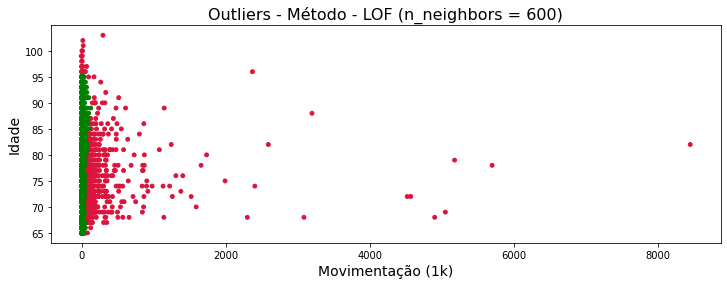

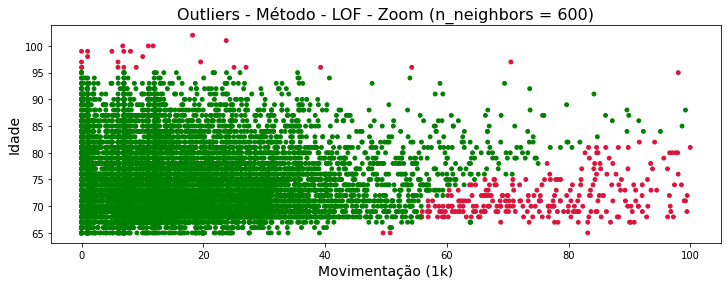

In [ ]:
#Rodando LOF com dado padronizado
parametros = ' (n_neighbors = 600)'
lof_df = bpc_zscore.copy()

tempo_exec = 0
start_time = time.time()

# Padronização
#lof_df = (lof_df - lof_df.mean())/(lof_df.std())
del lof_df['numbenef']
#print(lof_df.describe())

# modelo
lof_model = LocalOutlierFactor(n_neighbors=600,contamination=0.05,metric='manhattan')

y_pred = lof_model.fit_predict(lof_df)
#print(y_pred)
outlier_index = np.where(y_pred == -1)
outlier_index = outlier_index[0]
# print(outlier_index)

t = time.time() - start_time
tempo_exec += t
print("--- %s segundos ---" % (t))


#mostra resultado
lof_df = bpc.copy()
lof_df['Predictions'] = 0
lof_df.at[outlier_index, 'Predictions'] = 1

print('Número de registros de Outliers: ', np.size(outlier_index))
print('Número de beneficiários/benefícios verificados: ', lof_df.shape)
print('Percentual de de Outliers: ', 
      format(np.size(outlier_index)/lof_df.shape[0], '.2%'))

lof_df['total_mov'] = lof_df['total_mov'] / 1000
plota_anomalias(lof_df, titulo="Outliers - Método - LOF"+parametros, 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")
lof_df2 = lof_df.query('total_mov < 100')
plota_anomalias(lof_df2, titulo="Outliers - Método - LOF - Zoom"+parametros, 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")



### **2 - LOF - n_neighbors=1000**

--- 3.861687421798706 segundos ---
Número de registros de Outliers:  690
Número de beneficiários/benefícios verificados:  (13834, 4)
Percentual de de Outliers:  4.99%


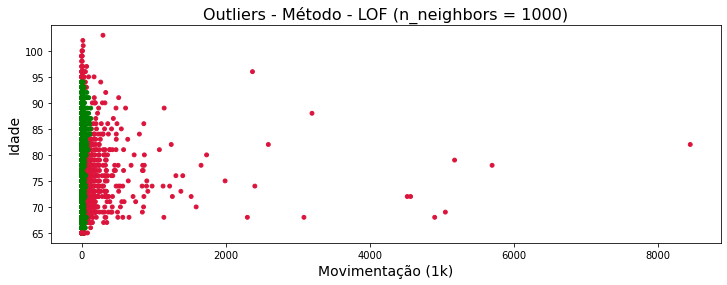

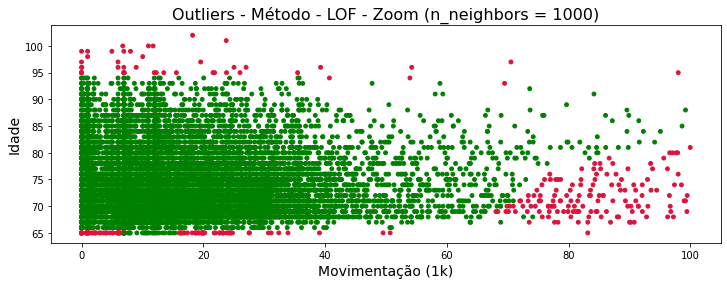

In [ ]:
#Rodando LOF com dado padronizado
parametros = ' (n_neighbors = 1000)'
lof_df = bpc_zscore.copy()

start_time = time.time()

# Padronização
#lof_df = (lof_df - lof_df.mean())/(lof_df.std())
del lof_df['numbenef']
#print(lof_df.describe())

# modelo
lof_model = LocalOutlierFactor(n_neighbors=1000,contamination=0.05,metric='manhattan')

y_pred = lof_model.fit_predict(lof_df)
#print(y_pred)
outlier_index = np.where(y_pred == -1)
outlier_index = outlier_index[0]
# print(outlier_index)

t = time.time() - start_time
tempo_exec += t
print("--- %s segundos ---" % (t))

#mostra resultado
lof_df = bpc.copy()
lof_df['Predictions'] = 0
lof_df.at[outlier_index, 'Predictions'] = 1

print('Número de registros de Outliers: ', np.size(outlier_index))
print('Número de beneficiários/benefícios verificados: ', lof_df.shape)
print('Percentual de de Outliers: ', 
      format(np.size(outlier_index)/lof_df.shape[0], '.2%'))

lof_df['total_mov'] = lof_df['total_mov'] / 1000
plota_anomalias(lof_df, titulo="Outliers - Método - LOF"+parametros, 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")
lof_df2 = lof_df.query('total_mov < 100')
plota_anomalias(lof_df2, titulo="Outliers - Método - LOF - Zoom"+parametros, 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")



### **3 - LOF - n_neighbors=200**

--- 0.760636568069458 segundos ---
Número de registros de Outliers:  692
Número de beneficiários/benefícios verificados:  (13834, 4)
Percentual de de Outliers:  5.00%


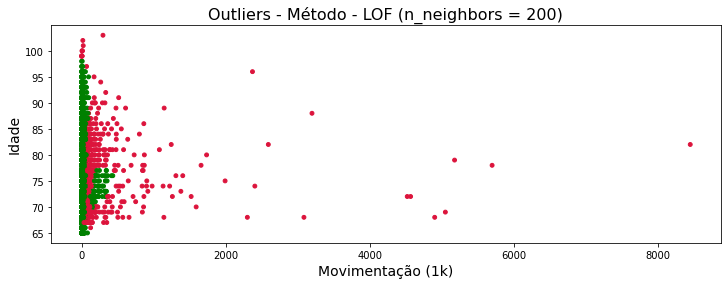

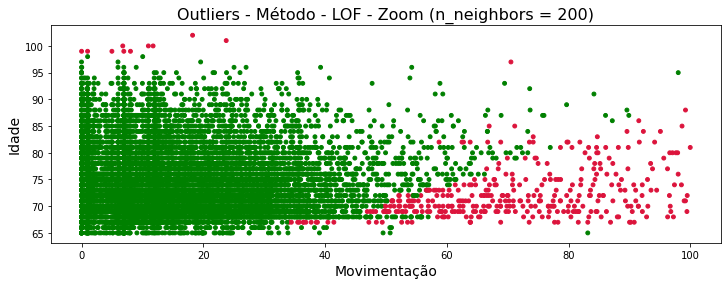

In [ ]:
#Rodando LOF com dado padronizado
parametros = ' (n_neighbors = 200)'
lof_df = bpc_zscore.copy()

start_time = time.time()

# Padronização
#lof_df = (lof_df - lof_df.mean())/(lof_df.std())
del lof_df['numbenef']
#print(lof_df.describe())

# modelo
lof_model = LocalOutlierFactor(n_neighbors=200,contamination=0.05,metric='manhattan')
#manhattan
#minkowski
#euclidean
y_pred = lof_model.fit_predict(lof_df)
#print(y_pred)
outlier_index = np.where(y_pred == -1)
outlier_index = outlier_index[0]
# print(outlier_index)

t = time.time() - start_time
tempo_exec += t
print("--- %s segundos ---" % (t))
tempos.append(['LOF', tempo_exec/3])

#mostra resultado
lof_df = bpc.copy()
lof_df['Predictions'] = 0
lof_df.at[outlier_index, 'Predictions'] = 1

print('Número de registros de Outliers: ', np.size(outlier_index))
print('Número de beneficiários/benefícios verificados: ', lof_df.shape)
print('Percentual de de Outliers: ', 
      format(np.size(outlier_index)/lof_df.shape[0], '.2%'))

lof_df['total_mov'] = lof_df['total_mov'] / 1000
plota_anomalias(lof_df, titulo="Outliers - Método - LOF"+parametros, 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")
lof_df2 = lof_df.query('total_mov < 100')
plota_anomalias(lof_df2, titulo="Outliers - Método - LOF - Zoom"+parametros, 
                x="total_mov", y="idade", xl="Movimentação", yl="Idade")

## **KNN**

### **1 - KNN usando pyod - retirando os warnings - Parâmetros: Idade (10, 5%) total_mov (10, 5%)**

--- 2.2925479412078857 segundos ---
Número total de registros de Outliers [idade]: 17 ( 0.12% )
Número total de registros de Outliers [total_mov]: 662 ( 4.79% )
Número de registros de Outliers:  677
Número de beneficiários/benefícios verificados:  13834
Percentual de de Outliers:  4.89%


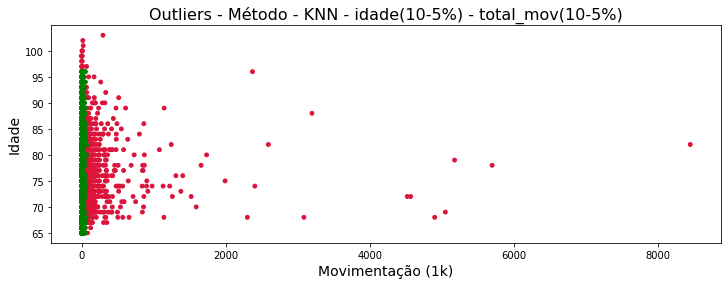

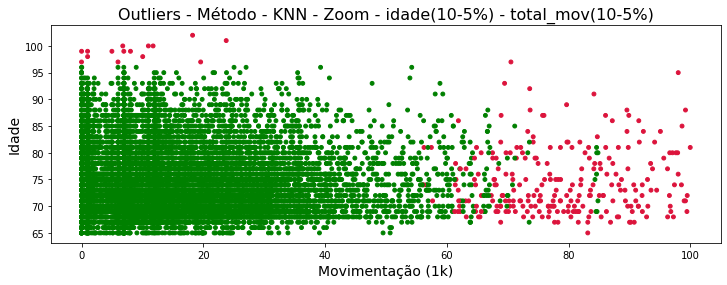

In [ ]:
parametros = ' - idade(10-5%) - total_mov(10-5%)'
df_knn = bpc.copy()
nn_idade = 10
nn_mov = 10

tempo_exec = 0
start_time = time.time()

# idade
data_to_predict_knn = df_knn['idade'].to_numpy().reshape(-1, 1)
knn_model = KNN(n_neighbors=nn_idade,contamination=0.05).fit(data_to_predict_knn)
predictions_knn = knn_model.predict(data_to_predict_knn)
outliers_idade = np.where(predictions_knn == 1)
outliers_idade = outliers_idade[0]
#print(outliers_idade)
#df_knn['Predictions'] = predictions_knn
#outliers_idade = df_knn.query('Predictions == 1').index.values

# movimentação
df_knn['Predictions'] = 0
data_to_predict_knn = df_knn['total_mov'].to_numpy().reshape(-1, 1)
knn_model = KNN(n_neighbors=nn_mov,contamination=0.05).fit(data_to_predict_knn)
predictions_knn = knn_model.predict(data_to_predict_knn)
#df_knn['Predictions'] = predictions_knn
#outliers_mov = df_knn.query('Predictions == 1').index.values
outliers_mov = np.where(predictions_knn == 1)
outliers_mov = outliers_mov[0]

df_knn['Predictions'] = 0
df_knn.at[outliers_idade, 'Predictions'] = 1
df_knn.at[outliers_mov, 'Predictions'] = 1
outliers_index = df_knn.query('Predictions == 1').index.values

t = time.time() - start_time
tempo_exec += t
print("--- %s segundos ---" % (t))

# Mostra qtd e percentuais
print('Número total de registros de Outliers [idade]:', np.size(outliers_idade), '(', 
      format(np.size(outliers_idade)/df_knn.shape[0], '.2%'),')')
print('Número total de registros de Outliers [total_mov]:', np.size(outliers_mov),'(', 
      format(np.size(outliers_mov)/df_knn.shape[0], '.2%'), ')')


print('Número de registros de Outliers: ', np.size(outliers_index))
print('Número de beneficiários/benefícios verificados: ', df_knn.shape[0])
print('Percentual de de Outliers: ', 
      format(np.size(outliers_index)/df_knn.shape[0], '.2%'))

df_knn['total_mov'] = df_knn['total_mov'] / 1000
plota_anomalias(df_knn, titulo="Outliers - Método - KNN"+parametros, 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")

df_knn2 = df_knn.query('total_mov < 100')
plota_anomalias(df_knn2, titulo="Outliers - Método - KNN - Zoom"+parametros, 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")


### **2 - KNN - Parâmetros: Idade (30, 5%) total_mov (30, 5%)**

--- 2.410599708557129 segundos ---
Número total de registros de Outliers [idade]: 68 ( 0.49% )
Número total de registros de Outliers [total_mov]: 680 ( 4.92% )
Número de registros de Outliers:  742
Número de beneficiários/benefícios verificados:  13834
Percentual de de Outliers:  5.36%


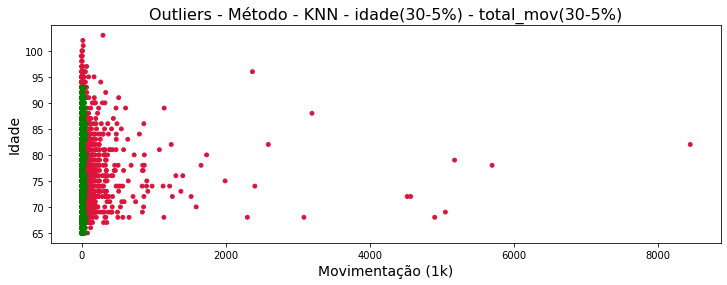

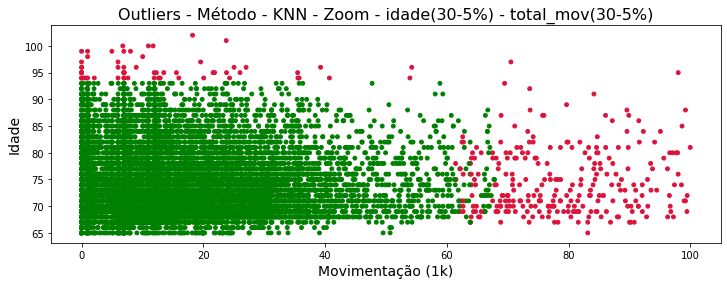

In [ ]:
parametros = ' - idade(30-5%) - total_mov(30-5%)'
df_knn = bpc.copy()
nn_idade = 30
nn_mov = 30
start_time = time.time()

# idade
data_to_predict_knn = df_knn['idade'].to_numpy().reshape(-1, 1)
knn_model = KNN(n_neighbors=nn_idade,contamination=0.05).fit(data_to_predict_knn)
predictions_knn = knn_model.predict(data_to_predict_knn)
outliers_idade = np.where(predictions_knn == 1)
outliers_idade = outliers_idade[0]

# movimentação
df_knn['Predictions'] = 0
data_to_predict_knn = df_knn['total_mov'].to_numpy().reshape(-1, 1)
knn_model = KNN(n_neighbors=nn_mov,contamination=0.05).fit(data_to_predict_knn)
predictions_knn = knn_model.predict(data_to_predict_knn)
outliers_mov = np.where(predictions_knn == 1)
outliers_mov = outliers_mov[0]

df_knn['Predictions'] = 0
df_knn.at[outliers_idade, 'Predictions'] = 1
df_knn.at[outliers_mov, 'Predictions'] = 1
outliers_index = df_knn.query('Predictions == 1').index.values

t = time.time() - start_time
tempo_exec += t
print("--- %s segundos ---" % (t))

# Mostra qtd e percentuais
print('Número total de registros de Outliers [idade]:', np.size(outliers_idade), '(', 
      format(np.size(outliers_idade)/df_knn.shape[0], '.2%'),')')
print('Número total de registros de Outliers [total_mov]:', np.size(outliers_mov),'(', 
      format(np.size(outliers_mov)/df_knn.shape[0], '.2%'), ')')


print('Número de registros de Outliers: ', np.size(outliers_index))
print('Número de beneficiários/benefícios verificados: ', df_knn.shape[0])
print('Percentual de de Outliers: ', 
      format(np.size(outliers_index)/df_knn.shape[0], '.2%'))

df_knn['total_mov'] = df_knn['total_mov'] / 1000
plota_anomalias(df_knn, titulo="Outliers - Método - KNN"+parametros, 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")

df_knn2 = df_knn.query('total_mov < 100')
plota_anomalias(df_knn2, titulo="Outliers - Método - KNN - Zoom"+parametros, 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")


### **3 - KNN - Parâmetros: Idade (100, 5%) total_mov (100, 5%)**

--- 2.9646666049957275 segundos ---
Número total de registros de Outliers [idade]: 326 ( 2.36% )
Número total de registros de Outliers [total_mov]: 687 ( 4.97% )
Número de registros de Outliers:  994
Número de beneficiários/benefícios verificados:  13834
Percentual de de Outliers:  7.19%


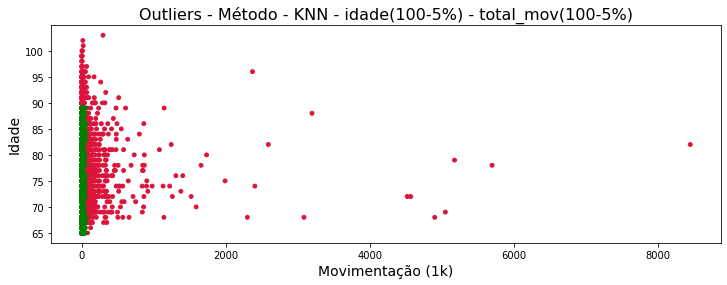

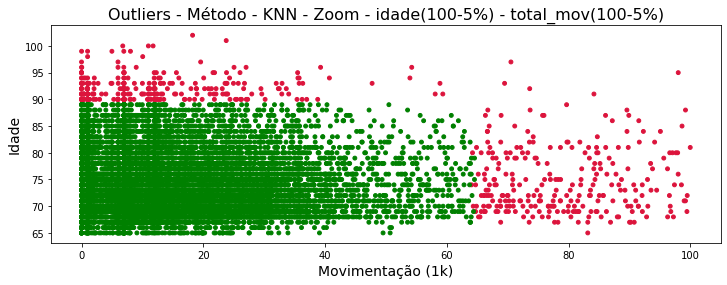

In [ ]:
parametros = ' - idade(100-5%) - total_mov(100-5%)'
df_knn = bpc.copy()
nn_idade = 100
nn_mov = 100

start_time = time.time()

# idade
data_to_predict_knn = df_knn['idade'].to_numpy().reshape(-1, 1)
knn_model = KNN(n_neighbors=nn_idade,contamination=0.05).fit(data_to_predict_knn)
predictions_knn = knn_model.predict(data_to_predict_knn)
outliers_idade = np.where(predictions_knn == 1)
outliers_idade = outliers_idade[0]
#print(outliers_idade)
#df_knn['Predictions'] = predictions_knn
#outliers_idade = df_knn.query('Predictions == 1').index.values

# movimentação
df_knn['Predictions'] = 0
data_to_predict_knn = df_knn['total_mov'].to_numpy().reshape(-1, 1)
knn_model = KNN(n_neighbors=nn_mov,contamination=0.05).fit(data_to_predict_knn)
predictions_knn = knn_model.predict(data_to_predict_knn)
#df_knn['Predictions'] = predictions_knn
#outliers_mov = df_knn.query('Predictions == 1').index.values
outliers_mov = np.where(predictions_knn == 1)
outliers_mov = outliers_mov[0]

df_knn['Predictions'] = 0
df_knn.at[outliers_idade, 'Predictions'] = 1
df_knn.at[outliers_mov, 'Predictions'] = 1
outliers_index = df_knn.query('Predictions == 1').index.values

t = time.time() - start_time
tempo_exec += t
print("--- %s segundos ---" % (t))

# Mostra qtd e percentuais
print('Número total de registros de Outliers [idade]:', np.size(outliers_idade), '(', 
      format(np.size(outliers_idade)/df_knn.shape[0], '.2%'),')')
print('Número total de registros de Outliers [total_mov]:', np.size(outliers_mov),'(', 
      format(np.size(outliers_mov)/df_knn.shape[0], '.2%'), ')')


print('Número de registros de Outliers: ', np.size(outliers_index))
print('Número de beneficiários/benefícios verificados: ', df_knn.shape[0])
print('Percentual de de Outliers: ', 
      format(np.size(outliers_index)/df_knn.shape[0], '.2%'))


df_knn['total_mov'] = df_knn['total_mov'] / 1000
plota_anomalias(df_knn, titulo="Outliers - Método - KNN"+parametros, 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")

df_knn2 = df_knn.query('total_mov < 100')
plota_anomalias(df_knn2, titulo="Outliers - Método - KNN - Zoom"+parametros, 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")


### **4 - KNN - Parâmetros: Idade (10, 5%) total_mov (100, 5%)**

--- 2.5599520206451416 segundos ---
Número total de registros de Outliers [idade]: 17 ( 0.12% )
Número total de registros de Outliers [total_mov]: 687 ( 4.97% )
Número de registros de Outliers:  702
Número de beneficiários/benefícios verificados:  13834
Percentual de de Outliers:  5.07%


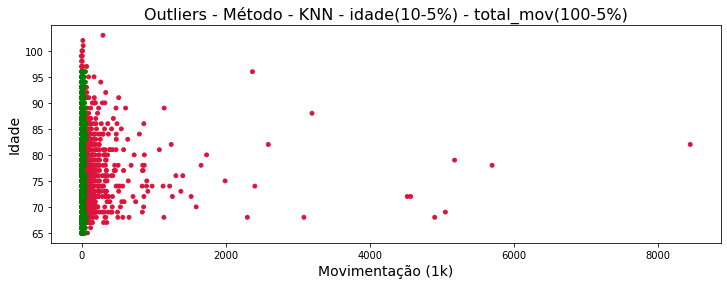

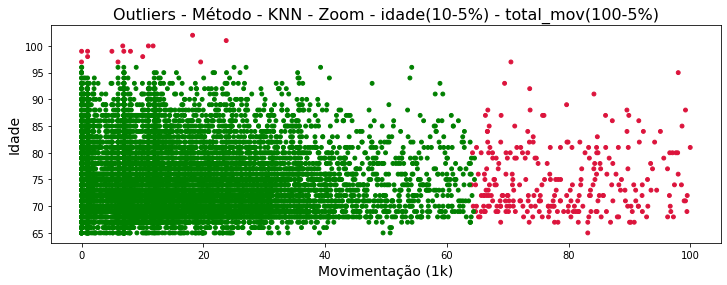

In [ ]:
parametros = ' - idade(10-5%) - total_mov(100-5%)'
df_knn = bpc.copy()
nn_idade = 10
nn_mov = 100

start_time = time.time()

# idade
data_to_predict_knn = df_knn['idade'].to_numpy().reshape(-1, 1)
knn_model = KNN(n_neighbors=nn_idade,contamination=0.05).fit(data_to_predict_knn)
predictions_knn = knn_model.predict(data_to_predict_knn)
outliers_idade = np.where(predictions_knn == 1)
outliers_idade = outliers_idade[0]
#print(outliers_idade)
#df_knn['Predictions'] = predictions_knn
#outliers_idade = df_knn.query('Predictions == 1').index.values

# movimentação
df_knn['Predictions'] = 0
data_to_predict_knn = df_knn['total_mov'].to_numpy().reshape(-1, 1)
knn_model = KNN(n_neighbors=nn_mov,contamination=0.05).fit(data_to_predict_knn)
predictions_knn = knn_model.predict(data_to_predict_knn)
#df_knn['Predictions'] = predictions_knn
#outliers_mov = df_knn.query('Predictions == 1').index.values
outliers_mov = np.where(predictions_knn == 1)
outliers_mov = outliers_mov[0]

df_knn['Predictions'] = 0
df_knn.at[outliers_idade, 'Predictions'] = 1
df_knn.at[outliers_mov, 'Predictions'] = 1
outliers_index = df_knn.query('Predictions == 1').index.values

t = time.time() - start_time
tempo_exec += t
print("--- %s segundos ---" % (t))

# Mostra qtd e percentuais
print('Número total de registros de Outliers [idade]:', np.size(outliers_idade), '(', 
      format(np.size(outliers_idade)/df_knn.shape[0], '.2%'),')')
print('Número total de registros de Outliers [total_mov]:', np.size(outliers_mov),'(', 
      format(np.size(outliers_mov)/df_knn.shape[0], '.2%'), ')')


print('Número de registros de Outliers: ', np.size(outliers_index))
print('Número de beneficiários/benefícios verificados: ', df_knn.shape[0])
print('Percentual de de Outliers: ', 
      format(np.size(outliers_index)/df_knn.shape[0], '.2%'))


df_knn['total_mov'] = df_knn['total_mov'] / 1000
plota_anomalias(df_knn, titulo="Outliers - Método - KNN"+parametros, 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")

df_knn2 = df_knn.query('total_mov < 100')
plota_anomalias(df_knn2, titulo="Outliers - Método - KNN - Zoom"+parametros, 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")


### **5 - KNN - Parâmetros: Idade (10, 5%) total_mov (200, 5%)**

--- 3.0318124294281006 segundos ---
Número total de registros de Outliers [idade]: 17 ( 0.12% )
Número total de registros de Outliers [total_mov]: 690 ( 4.99% )
Número de registros de Outliers:  705
Número de beneficiários/benefícios verificados:  13834
Percentual de de Outliers:  5.10%


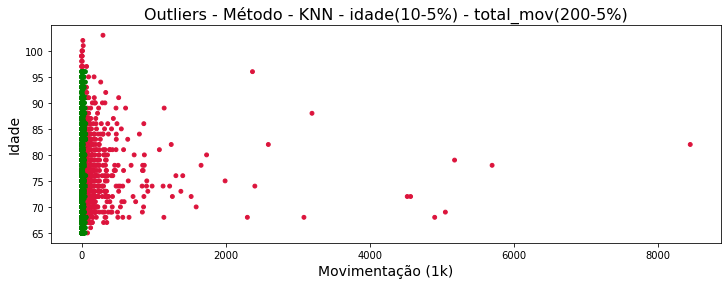

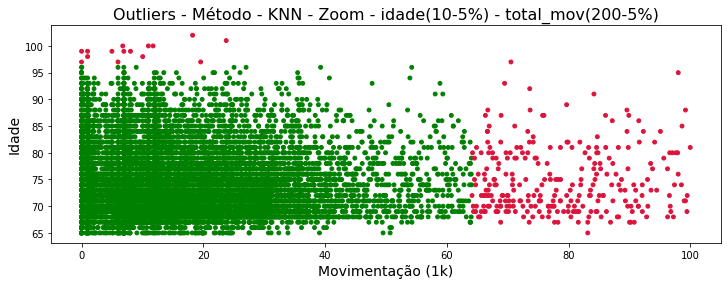

In [ ]:
parametros = ' - idade(10-5%) - total_mov(200-5%)'
df_knn = bpc.copy()
nn_idade = 10
nn_mov = 200

start_time = time.time()

# idade
data_to_predict_knn = df_knn['idade'].to_numpy().reshape(-1, 1)
knn_model = KNN(n_neighbors=nn_idade,contamination=0.05).fit(data_to_predict_knn)
predictions_knn = knn_model.predict(data_to_predict_knn)
outliers_idade = np.where(predictions_knn == 1)
outliers_idade = outliers_idade[0]
#print(outliers_idade)
#df_knn['Predictions'] = predictions_knn
#outliers_idade = df_knn.query('Predictions == 1').index.values

# movimentação
df_knn['Predictions'] = 0
data_to_predict_knn = df_knn['total_mov'].to_numpy().reshape(-1, 1)
knn_model = KNN(n_neighbors=nn_mov,contamination=0.05).fit(data_to_predict_knn)
predictions_knn = knn_model.predict(data_to_predict_knn)
#df_knn['Predictions'] = predictions_knn
#outliers_mov = df_knn.query('Predictions == 1').index.values
outliers_mov = np.where(predictions_knn == 1)
outliers_mov = outliers_mov[0]

df_knn['Predictions'] = 0
df_knn.at[outliers_idade, 'Predictions'] = 1
df_knn.at[outliers_mov, 'Predictions'] = 1
outliers_index = df_knn.query('Predictions == 1').index.values

t = time.time() - start_time
tempo_exec += t
print("--- %s segundos ---" % (t))
tempos.append(['KNN', tempo_exec/5])

# Mostra qtd e percentuais
print('Número total de registros de Outliers [idade]:', np.size(outliers_idade), '(', 
      format(np.size(outliers_idade)/df_knn.shape[0], '.2%'),')')
print('Número total de registros de Outliers [total_mov]:', np.size(outliers_mov),'(', 
      format(np.size(outliers_mov)/df_knn.shape[0], '.2%'), ')')


print('Número de registros de Outliers: ', np.size(outliers_index))
print('Número de beneficiários/benefícios verificados: ', df_knn.shape[0])
print('Percentual de de Outliers: ', 
      format(np.size(outliers_index)/df_knn.shape[0], '.2%'))


df_knn['total_mov'] = df_knn['total_mov'] / 1000
plota_anomalias(df_knn, titulo="Outliers - Método - KNN"+parametros, 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")

df_knn2 = df_knn.query('total_mov < 100')
plota_anomalias(df_knn2, titulo="Outliers - Método - KNN - Zoom"+parametros, 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")


## **Método KMeans - Adaptação para achar outliers**

### **Rotina de Deteção de Outliers usando KMeans**

In [ ]:
def detecta_outliers_kmeans(dado, k=2, p_outliers=0.05):
    # copia o dado
    df = dado.copy()
    # define modelo
    km_model = KMeans(n_clusters=k)
    # aplica modelo
    kc = km_model.fit_predict(df)
    #print(kc)
    # captura centroides calculados
    ce = km_model.cluster_centers_
    dt = np.empty((0,df.shape[0]), float)
    # capura as distancias
    for i, center_elem in enumerate(ce):
      # print('Cluster: ', i, 'Registros:', df[kc == i].shape[0])
      dt = np.append(dt, cdist([center_elem],df[kc == i], 'euclidean')) 
    
    # indica os pontos onde a distnacia é maior que determinado
    percent = (1 - p_outliers) * 100
    out = np.where(dt > np.percentile(dt, percent))
    out = out[0]
    df['Predictions'] = 0
    df.at[out, 'Predictions'] = 1
    return df


### **Código sem uso da rotina - plotando resultados**

Calculando distancia cluster ... 0
Número de registros de Outliers:  692
Número de beneficiários/benefícios verificados:  13834
Percentual de de Outliers:  5.00%


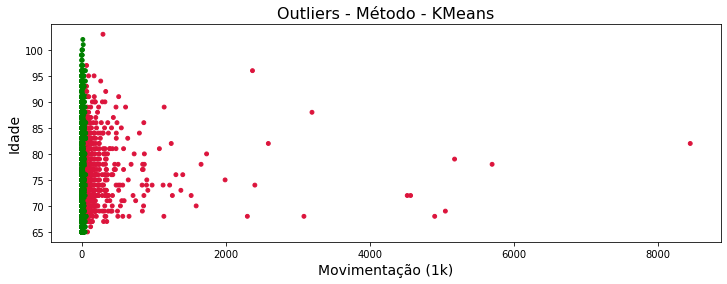

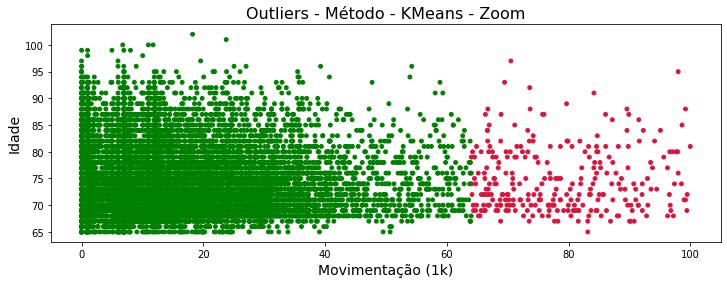

In [ ]:



#km_df = bpc_zscore.copy()
km_df= bpc.copy()
del km_df['numbenef']
km = KMeans(n_clusters = 1)
cl_clusters=km.fit_predict(km_df)
# plotting data set
#plt.scatter(*zip(*km_df))

# obtaining the centers of the clusters
centroids = km.cluster_centers_
#print(centroids)

# points array will be used to reach the index easy
points = np.empty((0,km_df.shape[0]), float)
#print(points)

# distances will be used to calculate outliers
distances = np.empty((0,km_df.shape[0]), float)


for i, center_elem in enumerate(centroids):
    # cdist is used to calculate the distance between center and other points
    distances = np.append(distances, cdist([center_elem],km_df[cl_clusters == i], 'euclidean')) 
    print('Calculando distancia cluster ...', i)
    #print(km_df[cl_clusters == i])
    points = np.append(points, km_df[cl_clusters == i])

#print('Distâncias')
#print(distances)
#print('Pontos:')
#print(points[3])

percentile = 95
# getting outliers whose distances are greater than some percentile
outliers = np.where(distances > np.percentile(distances, percentile))
outliers = outliers[0]
#print(outliers)

km_df = bpc.copy()

# marca outliers
km_df['Predictions'] = 0
km_df.at[outliers, 'Predictions'] = 1



# Mostra qtd e percentuais

print('Número de registros de Outliers: ', np.size(outliers))
print('Número de beneficiários/benefícios verificados: ', km_df.shape[0])
print('Percentual de de Outliers: ', 
      format(np.size(outliers)/km_df.shape[0], '.2%'))

km_df['total_mov'] = km_df['total_mov'] / 1000
plota_anomalias(km_df, titulo="Outliers - Método - KMeans", 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")

km_df2 = km_df.query('total_mov < 100')
plota_anomalias(km_df2, titulo="Outliers - Método - KMeans - Zoom", 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")


### **Código usando a rotina - plotando resultados**

Número de registros de Outliers:  692
Número de beneficiários/benefícios verificados:  13834
Percentual de de Outliers:  5.00%


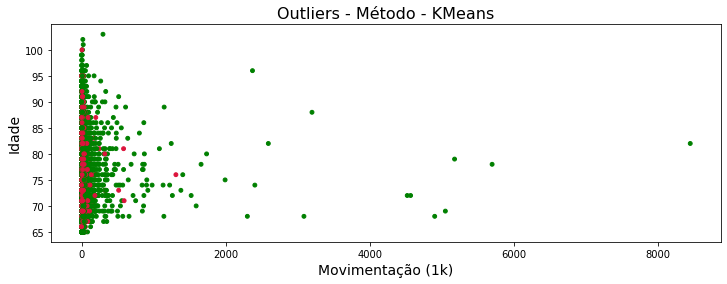

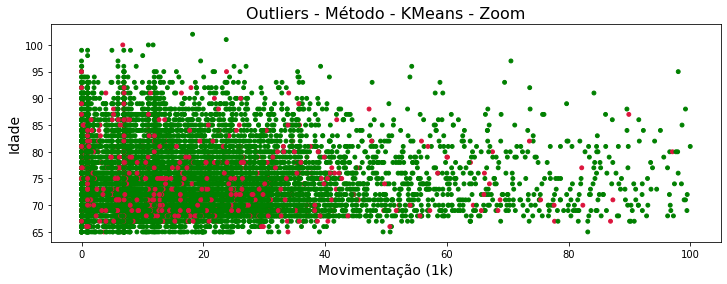

In [ ]:
#Usando a função
km_df= bpc.copy()
del km_df['numbenef']

km_df = detecta_outliers_kmeans(km_df, k=20, p_outliers=0.05)

# marca outliers
outliers = km_df.query('Predictions == 1').index.values



# Mostra qtd e percentuais

print('Número de registros de Outliers: ', np.size(outliers))
print('Número de beneficiários/benefícios verificados: ', km_df.shape[0])
print('Percentual de de Outliers: ', 
      format(np.size(outliers)/km_df.shape[0], '.2%'))

km_df['total_mov'] = km_df['total_mov'] / 1000
plota_anomalias(km_df, titulo="Outliers - Método - KMeans", 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")

km_df2 = km_df.query('total_mov < 100')
plota_anomalias(km_df2, titulo="Outliers - Método - KMeans - Zoom", 
                x="total_mov", y="idade", xl="Movimentação (1k)", yl="Idade")


## Códigos de teste - não utilizados

In [ ]:


# km_model = EllipticEnvelope(random_state=42) # ficou legal
# from sklearn.linear_model import SGDOneClassSVM
#km_model = SGDOneClassSVM(
#    nu=0.5, shuffle=True, fit_intercept=True, random_state=42, tol=1e-3
#)

start_time = time.time()

km_model = KMeans(n_clusters=7, random_state=42)
# print(km_model)



# mad idade
km_model = KMeans(n_clusters=30, random_state=42)
km_df = fit_predict_model(modelo = km_model, coluna='idade', dado=bpc)

# adaptação para idade - conideremos apenas um grupo - onde está a maior idade
idx = km_df['idade'].argmax()
cluster_anomalia = km_df.loc[idx, 'Predictions']
filtro_sql = 'Predictions == ' + str(cluster_anomalia)
outliers_idade = km_df.query(filtro_sql).index.values




# mad movimentação
km_model = KMeans(n_clusters=8, random_state=42)
km_df = fit_predict_model(modelo = km_model, coluna='total_mov', dado=bpc)

# adaptação para idade
# somente o grupo mais populosos será considerado normal
predictios_group = km_df.groupby(['Predictions'],as_index=False)['numbenef'].count()
idx = predictios_group['numbenef'].argmax()
cluster_anomalia = km_df.loc[idx, 'Predictions']
                                
filtro_sql = 'Predictions != ' + str(cluster_anomalia)
outliers_mov = km_df.query('Predictions != 0').index.values



# marca outliers
km_df['Predictions'] = 0
km_df.at[outliers_idade, 'Predictions'] = 1
km_df.at[outliers_mov, 'Predictions'] = 1

print("--- %s seconds ---" % (time.time() - start_time))

#Plota resultado
subbpc = km_df.query('Predictions == 1')

# Mostra qtd e percentuais
print('Número total de registros de Outliers [idade]:', np.size(outliers_idade), '(', 
      format(np.size(outliers_idade)/km_df.shape[0], '.2%'),')')
print('Número total de registros de Outliers [total_mov]:', np.size(outliers_mov),'(', 
      format(np.size(outliers_mov)/km_df.shape[0], '.2%'), ')')
print('Número de registros de Outliers: ', subbpc.shape[0])
print('Número de beneficiários/benefícios verificados: ', km_df.shape[0])
print('Percentual de de Outliers: ', 
      format(subbpc.shape[0]/km_df.shape[0], '.2%'))
plota_anomalias(km_df, titulo="Outliers - Método - KMeans", 
                x="total_mov", y="idade", xl="Movimentação", yl="Idade",esquemadecores=['darkgreen','crimson'])

km_df2 = km_df.query('total_mov < 100000')
plota_anomalias(km_df2, titulo="Outliers - Método - KMeans - Zoom", 
                x="total_mov", y="idade", xl="Movimentação", yl="Idade",esquemadecores=['darkgreen','crimson'])

In [ ]:
print(tempos)